# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.10.1 xgboost==2.0.3 -q --user

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement imblearn==0.10.1 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.10.1


In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
!pip install --upgrade -q threadpoolctl

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement imblearn==0.12.0 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.12.0


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
bank_churn = pd.read_csv("BankChurners.csv")

In [ ]:
bank_churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Loading the dataset

In [ ]:
# Shape of the dataset
bank_churn.shape

(10127, 21)

It has 10127 rows and 21 Columns.

## Data Overview

- Observations
- Sanity checks

In [ ]:
#Copy the dataset to another variable
bank_data = bank_churn.copy()
#display the first 5 rows of the dataset
bank_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
#display the last 5 rows of the dataset
bank_data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [ ]:
#checking the data type of each column 
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Checking for null values
bank_data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Education Level column has 15149 values are missing.
Marital Status column has 749 values are missing.

In [ ]:
#checking for duplicates
bank_data.duplicated().sum()

0

bank data has no duplicates.

In [ ]:
# describe the dataset
bank_data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,739177606.334,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,36903783.450,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,708082083.000,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,713036770.500,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,717926358.000,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,773143533.000,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,828343083.000,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


**Customer Age**
The mean age of the customers is 38.5 years. Max Customer Age is 73 Years and Min Customer Age is 18 years.

**Dependent count**
Some of the customers are no dependents and max dependent count is 5.

**Total Relationship Count**
Customers are having relationship with bank raning from 1 year to 6 years. 
**Inactive Accounts**
There are 6 inactive accounts in the dataset.
**Credit Limit**
Minimum credit limit is 1000 and Maximum credit limit is 34516.


In [ ]:
bank_data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
for i in bank_data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(bank_data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
bank_data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
bank_data["Attrition_Flag"].replace({"Existing Customer": 0, "Attrited Customer": 1}, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

***Univariate Analysis***

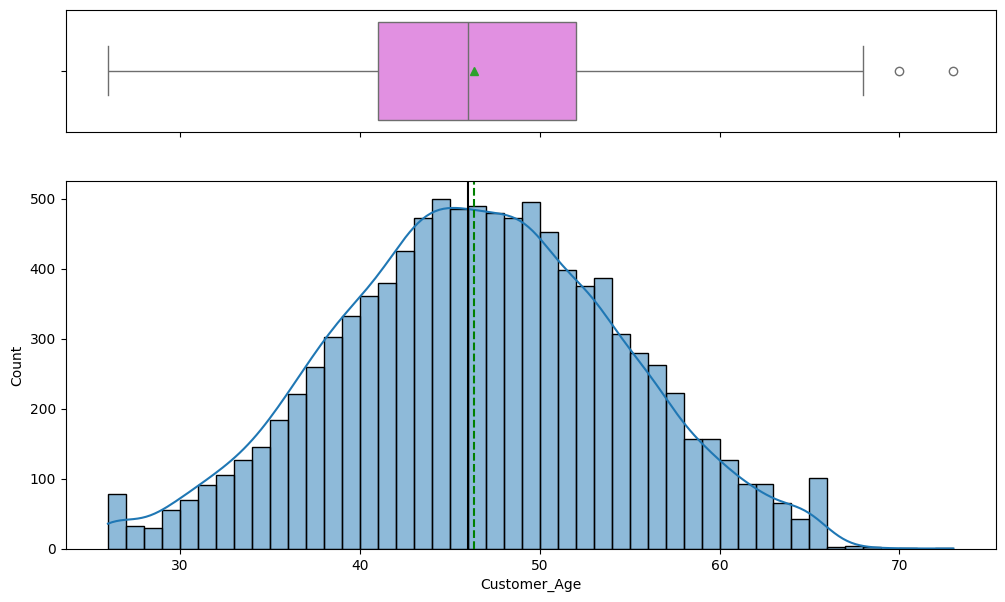

In [ ]:
# histogram and boxplot of Customer Age
histogram_boxplot(bank_data,  "Customer_Age", kde=True)

#### Observation on Customer Age
Majority of Customers are between 40-55 and with median 46.35

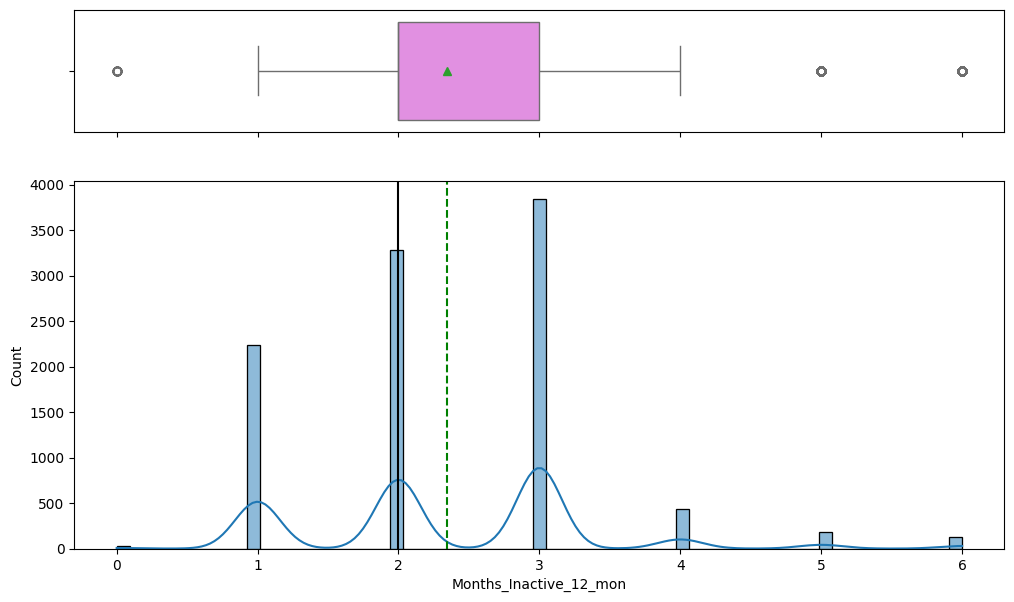

In [ ]:
#histogram and boxplot of Months_Inactive_12_mon
histogram_boxplot(bank_data,  "Months_Inactive_12_mon", kde=True)

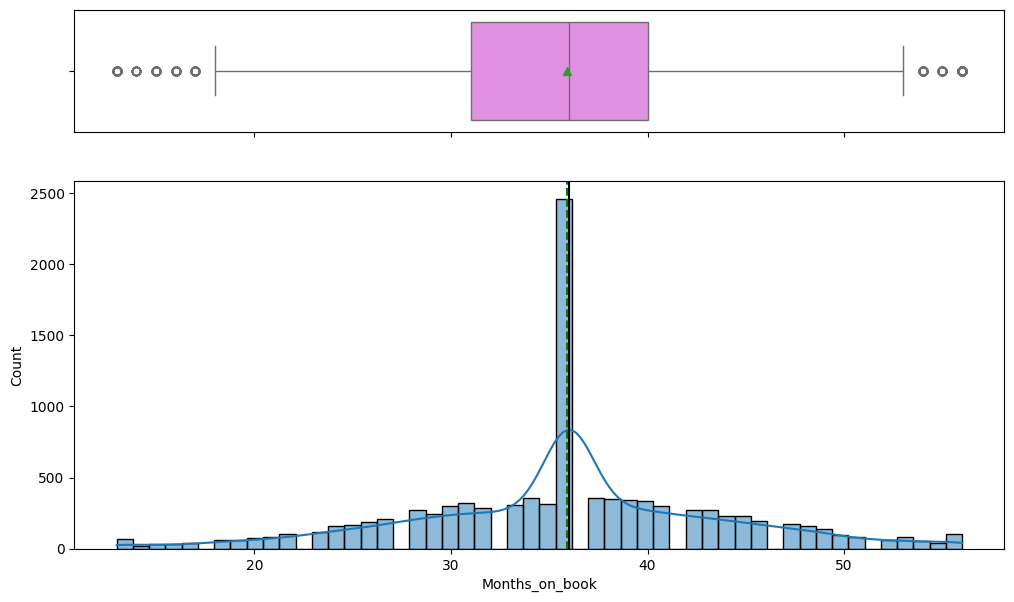

In [ ]:
#histogram and boxplot of Months on Book   
histogram_boxplot(bank_data,  "Months_on_book", kde=True)

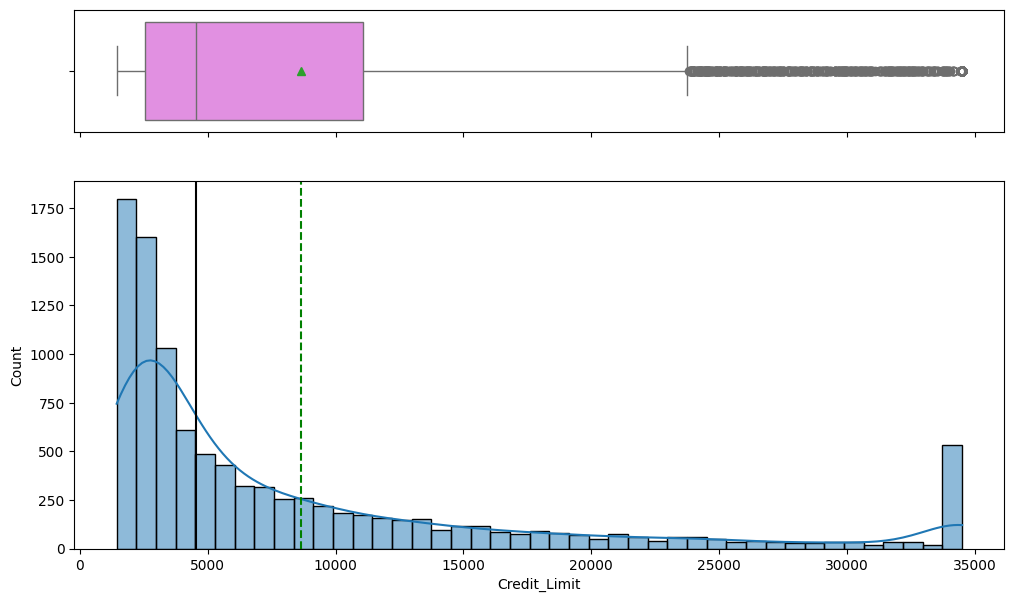

In [ ]:
# Create histogram and boxplot of Credit Limit 
histogram_boxplot(bank_data,  "Credit_Limit", kde=True)

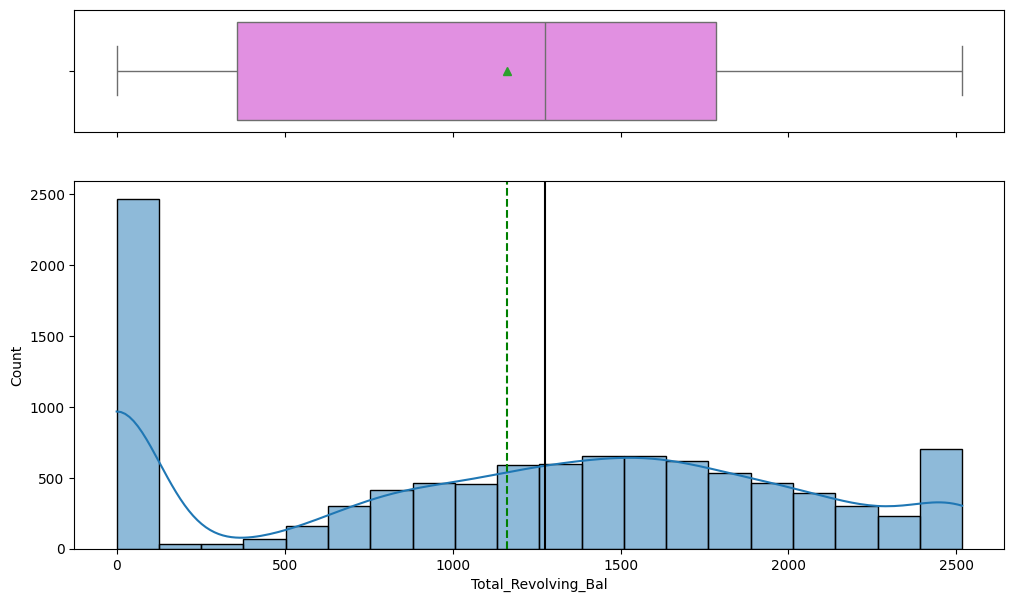

In [ ]:
#Create histogram and boxplot of Total Revolving balance 
histogram_boxplot(bank_data,  "Total_Revolving_Bal", kde=True)

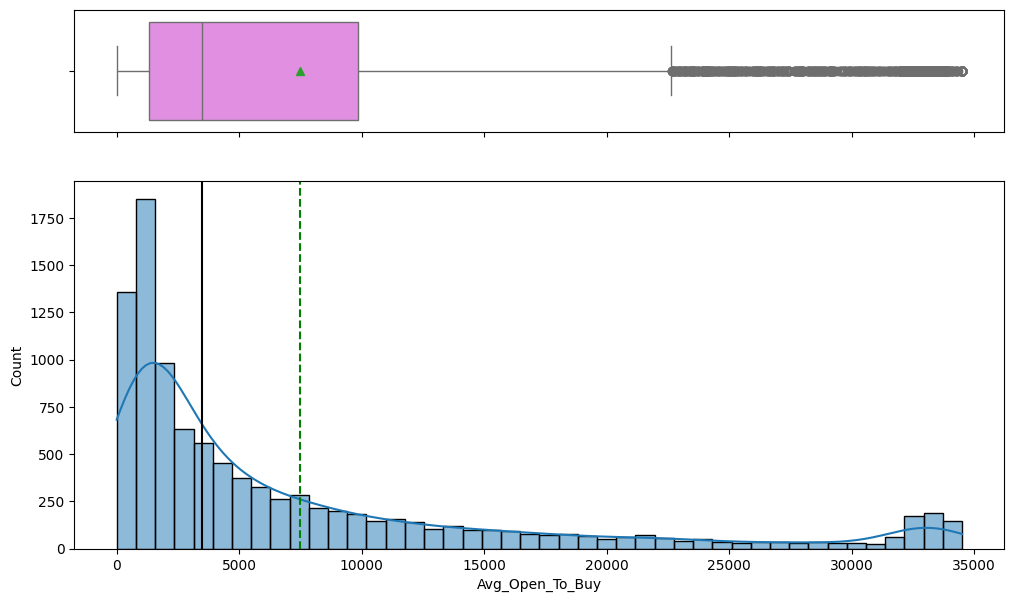

In [ ]:
#Create Historgram for Avg_Open_To_Buy 
histogram_boxplot(bank_data,  "Avg_Open_To_Buy", kde=True)

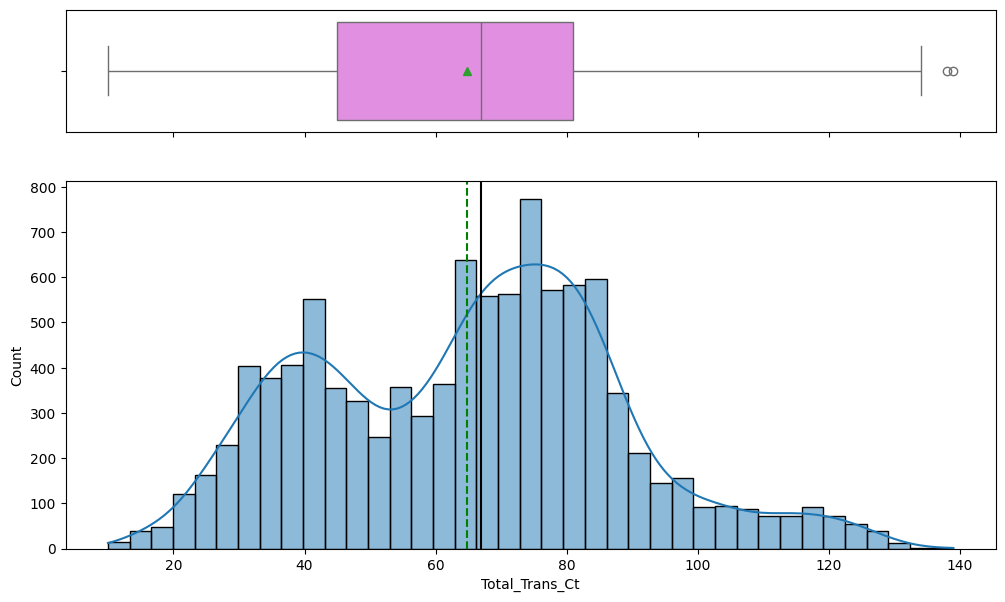

In [ ]:
#Create histogram for Total_Trans_Ct
histogram_boxplot(bank_data,  "Total_Trans_Ct", kde=True)

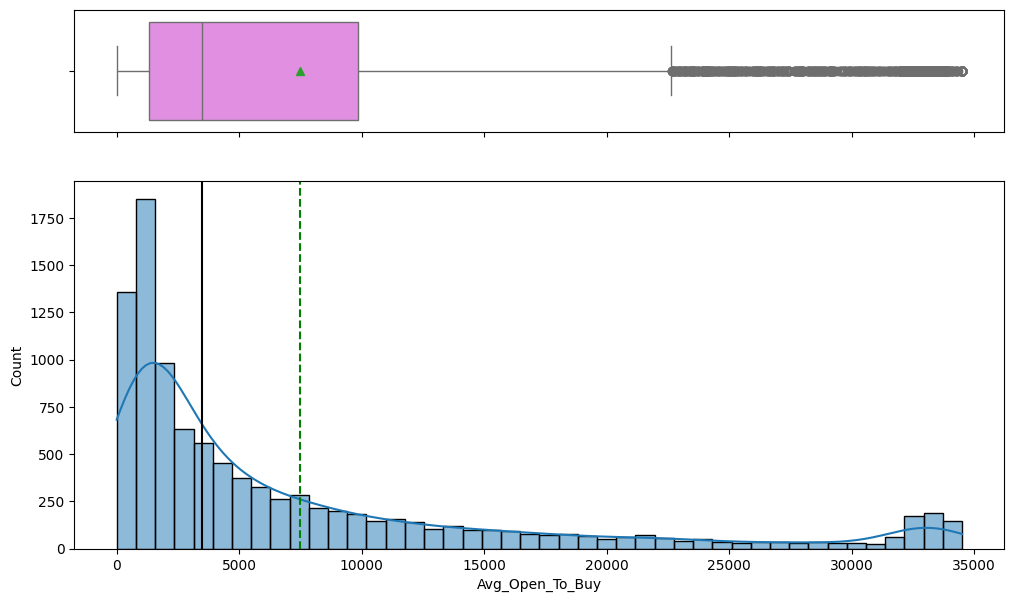

In [ ]:
#Create histogram for Avg_Open_To_Buy 
histogram_boxplot(bank_data,  "Avg_Open_To_Buy", kde=True)

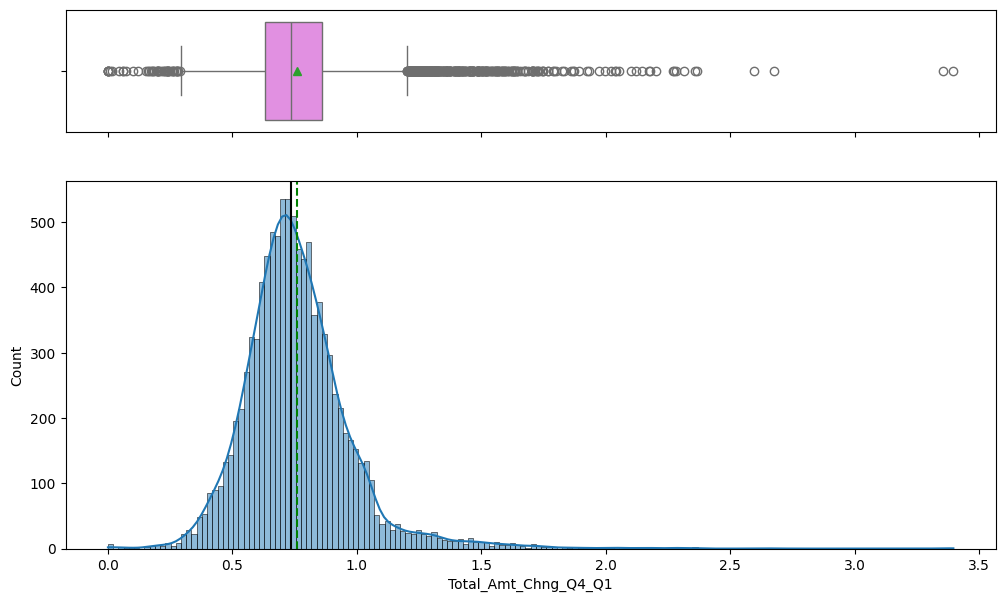

In [ ]:
#Create histogram for Total_Amt_Chng_Q4_Q1 
histogram_boxplot(bank_data,  "Total_Amt_Chng_Q4_Q1", kde=True)

### Analysis of Transaction Amounts ###

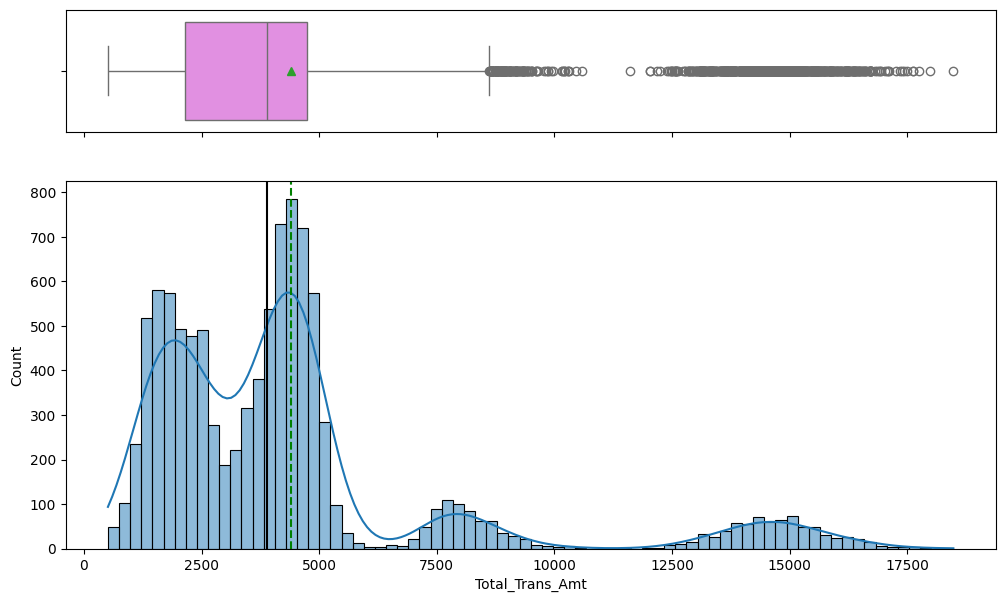

In [ ]:
#Create histogram for Total_Trans_Amt 
histogram_boxplot(bank_data,  "Total_Trans_Amt", kde=True)

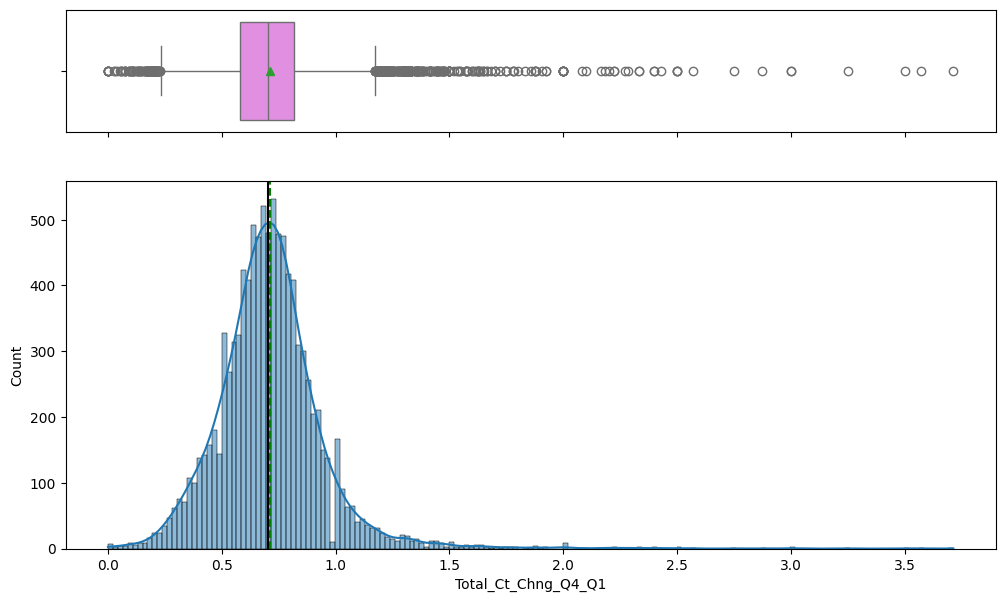

In [ ]:
#Create histogram for Total_Ct_Chng_Q4_Q1 
histogram_boxplot(bank_data,  "Total_Ct_Chng_Q4_Q1", kde=True)

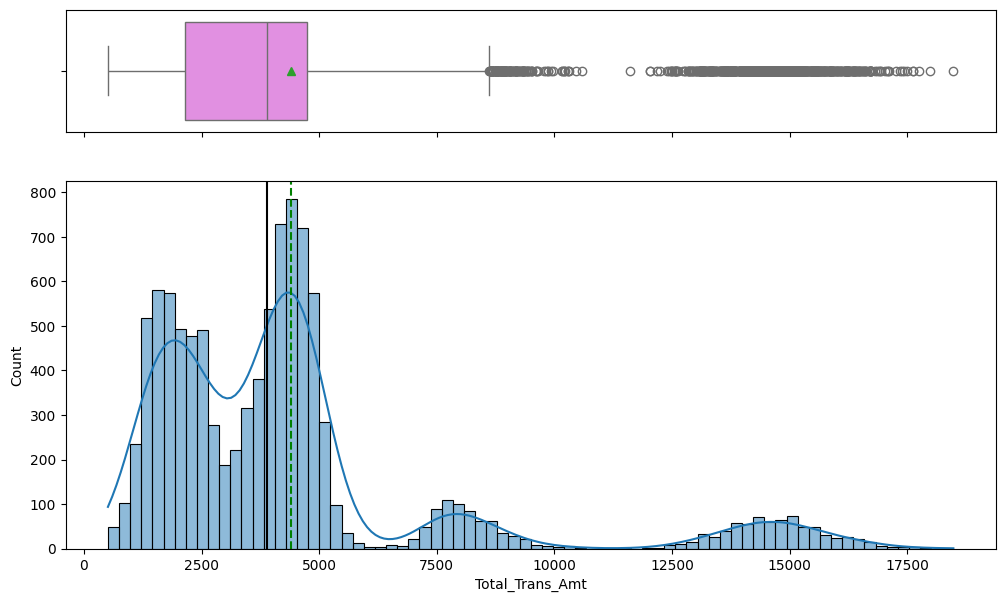

In [ ]:
#Create histogram for Total_Trans_Amt 
histogram_boxplot(bank_data,  "Total_Trans_Amt", kde=True)

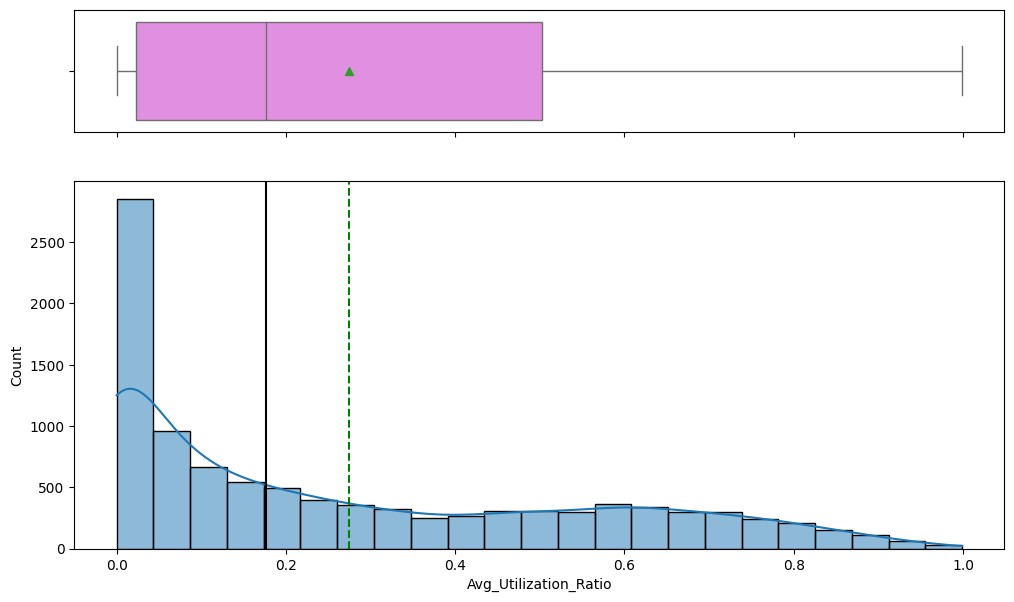

In [ ]:
#Create histogram for Avg_Utilization_Ratio 
histogram_boxplot(bank_data,  "Avg_Utilization_Ratio", kde=True)

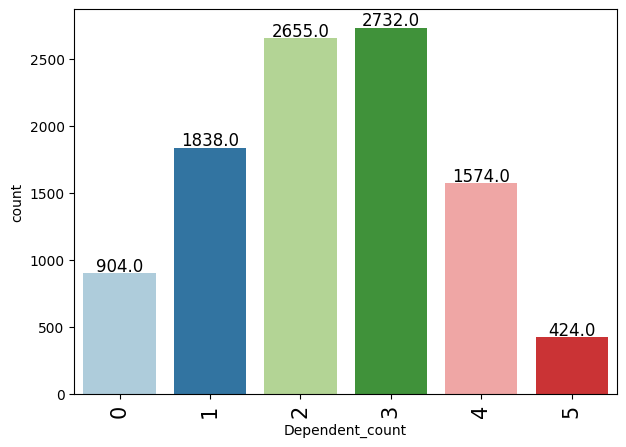

In [ ]:
# Bar Plot for Dependent count
labeled_barplot(bank_data, "Dependent_count")

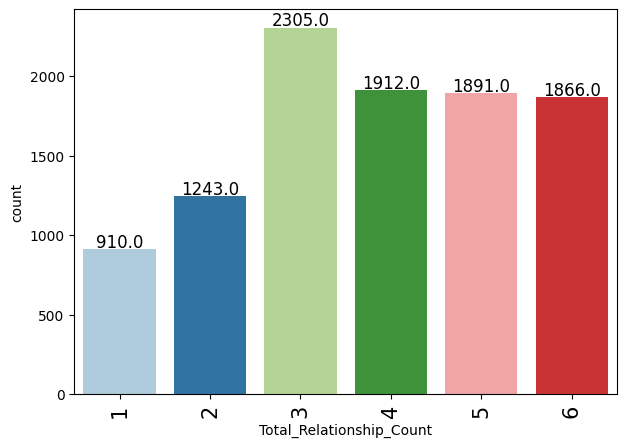

In [ ]:
# Bar Plot for Total_Relationship_Count
labeled_barplot(bank_data, "Total_Relationship_Count")

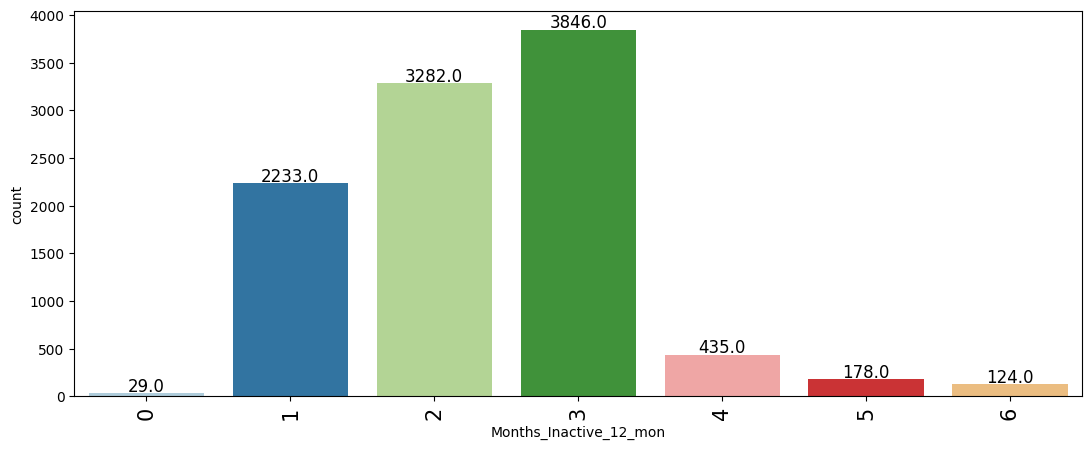

In [ ]:
# Months Inactive in the last 12 months
labeled_barplot(bank_data, "Months_Inactive_12_mon", n=12)

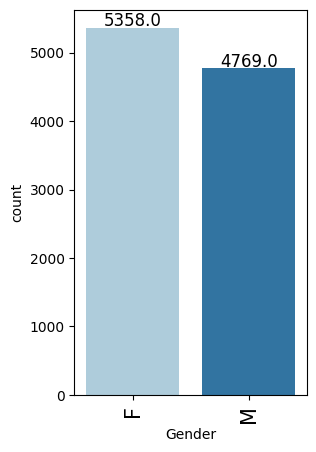

In [ ]:
# Count the number of Genders in the dataset
labeled_barplot(bank_data, "Gender")

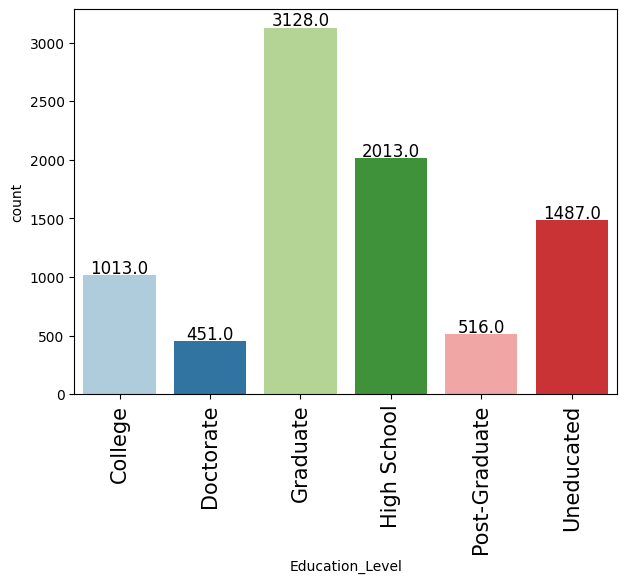

In [ ]:
# Plot the education level
labeled_barplot(bank_data,"Education_Level")

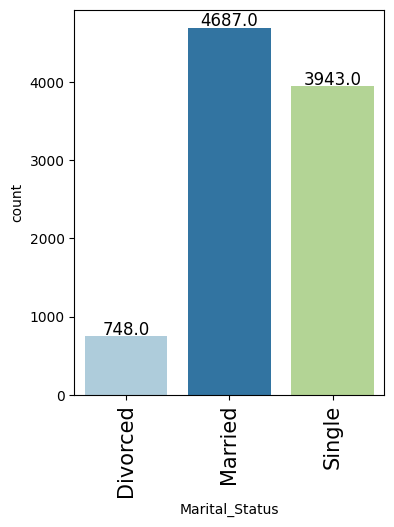

In [ ]:
# Plot the Marital Status
labeled_barplot(bank_data,"Marital_Status")

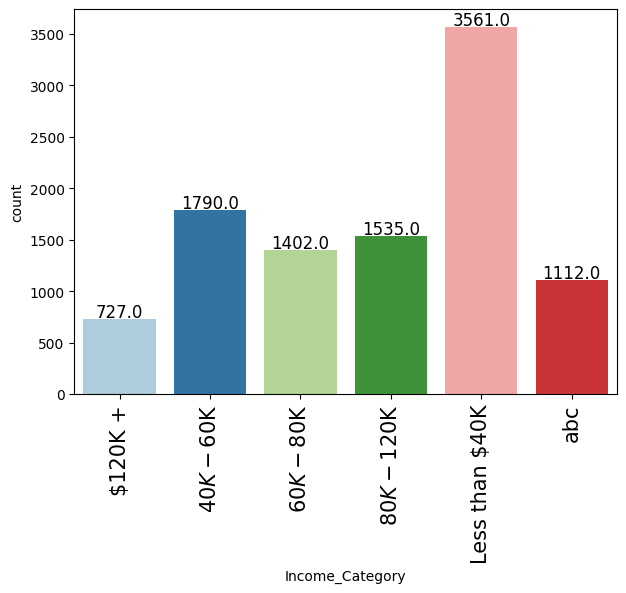

In [ ]:
#Check the distribution of Income Categories
labeled_barplot(bank_data,"Income_Category")

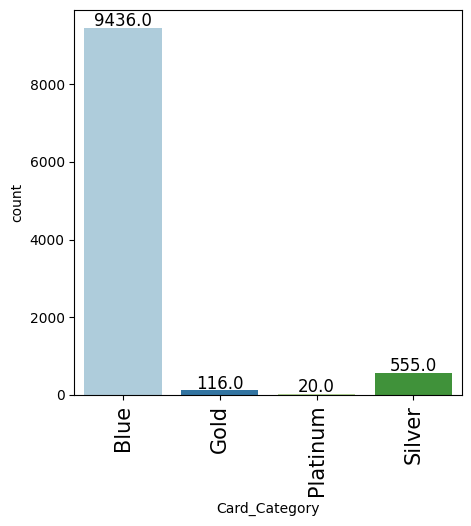

In [ ]:
#Check the distribution of Card Categories
labeled_barplot(bank_data,"Card_Category")

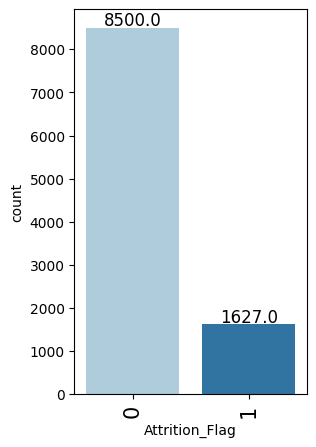

In [ ]:
#Check the distribution of Attrition_Flag
labeled_barplot(bank_data,"Attrition_Flag")

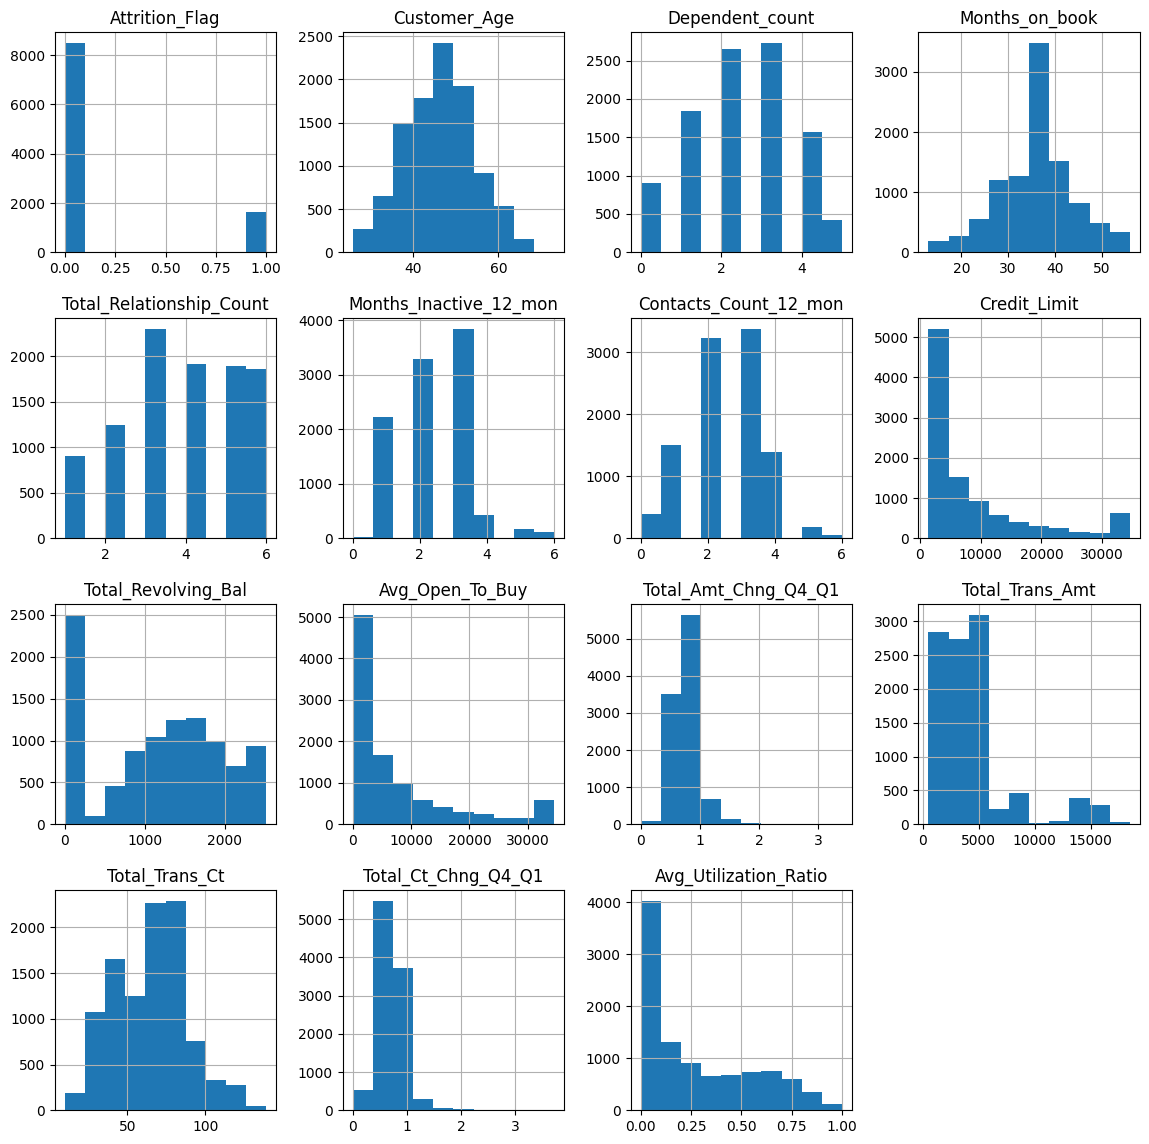

In [ ]:
bank_data.hist(figsize=(14,14))
plt.show()

### Bivariate Distributions

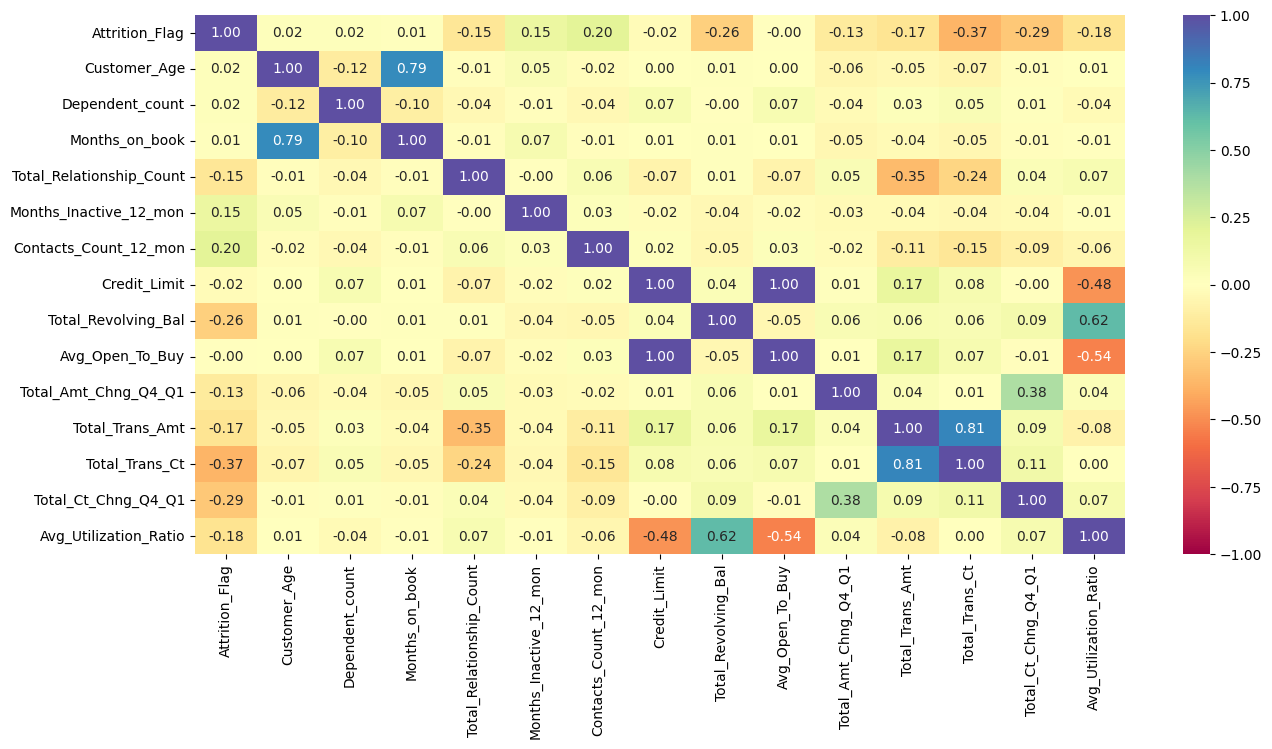

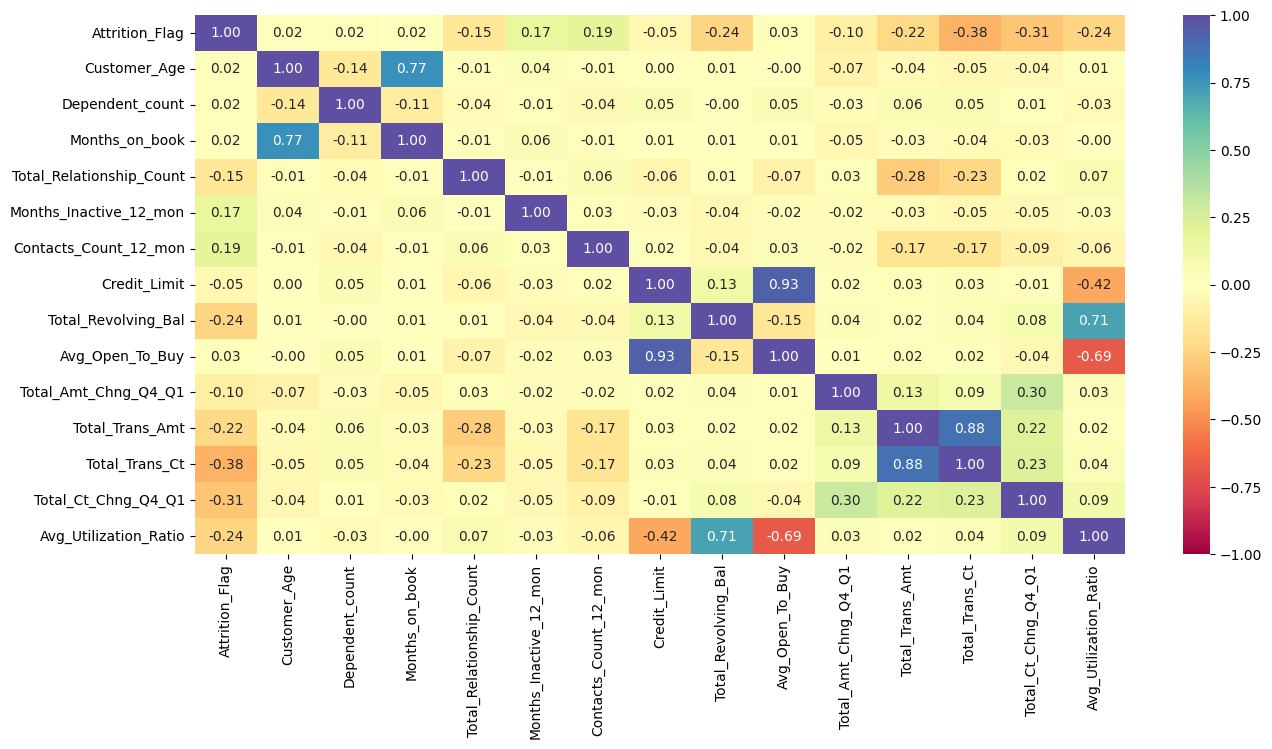

In [ ]:
# Print both Pearson Correlation and Spearman Correlation for numerical columns with heatmap 
plt.figure(figsize=(15, 7))
sns.heatmap(bank_data.select_dtypes(include=[np.number]).corr('pearson'), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") 
plt.show()
plt.figure(figsize=(15, 7))
sns.heatmap(bank_data.select_dtypes(include=[np.number]).corr('spearman'), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") 
plt.show()

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


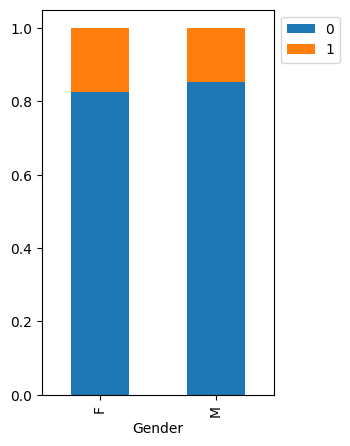

In [ ]:
stacked_barplot(bank_data, "Gender", "Attrition_Flag")

`Attrition_Flag vs Marital_Status`

Marital_Status  Divorced  Married  Single   All
Attrition_Flag                                 
All                  748     4687    3943  9378
0                    627     3978    3275  7880
1                    121      709     668  1498
------------------------------------------------------------------------------------------------------------------------


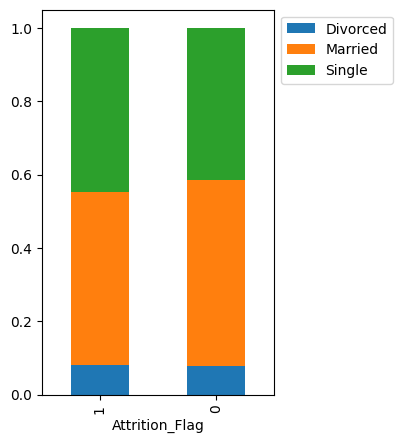

In [ ]:
stacked_barplot(bank_data, "Attrition_Flag", "Marital_Status")

`Attrition_Flag vs Education_Level`

Education_Level  College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                              
All                 1013        451      3128         2013            516   
0                    859        356      2641         1707            424   
1                    154         95       487          306             92   

Education_Level  Uneducated   All  
Attrition_Flag                     
All                    1487  8608  
0                      1250  7237  
1                       237  1371  
------------------------------------------------------------------------------------------------------------------------


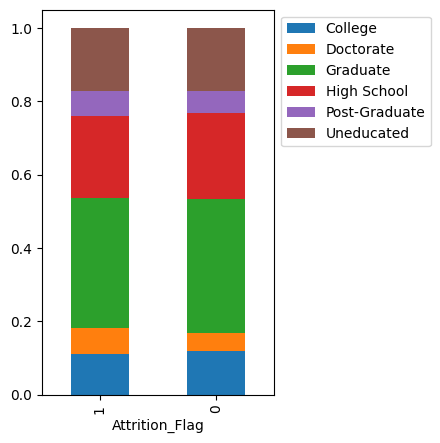

In [ ]:
stacked_barplot(bank_data, "Attrition_Flag", "Education_Level")

### Atribution Flag vs Income Category

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                     
All                  727         1790         1402          1535   
0                    601         1519         1213          1293   
1                    126          271          189           242   

Income_Category  Less than $40K   abc    All  
Attrition_Flag                                
All                        3561  1112  10127  
0                          2949   925   8500  
1                           612   187   1627  
------------------------------------------------------------------------------------------------------------------------


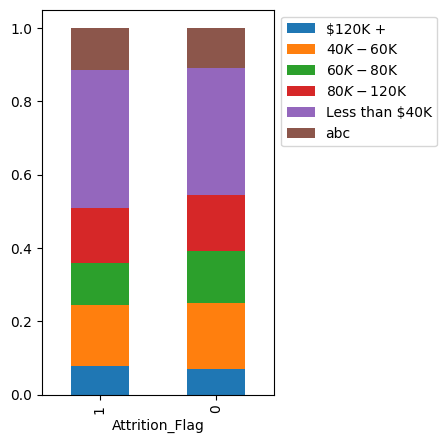

In [ ]:
stacked_barplot(bank_data, "Attrition_Flag", "Income_Category")

`Attrition_Flag vs Contacts_Count_12_mon`

Contacts_Count_12_mon    0     1     2     3     4    5   6    All
Attrition_Flag                                                    
1                        7   108   403   681   315   59  54   1627
All                    399  1499  3227  3380  1392  176  54  10127
0                      392  1391  2824  2699  1077  117   0   8500
------------------------------------------------------------------------------------------------------------------------


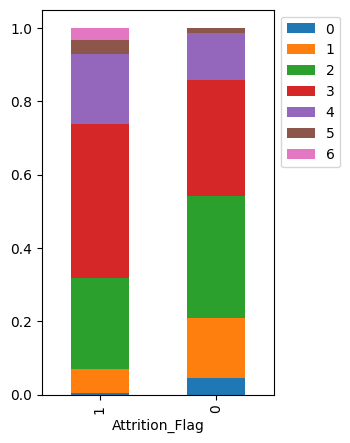

In [ ]:
stacked_barplot(bank_data, "Attrition_Flag", "Contacts_Count_12_mon")

`Attrition_Flag vs Dependent_count`

Dependent_count    0     1     2     3     4    5    All
Attrition_Flag                                          
All              904  1838  2655  2732  1574  424  10127
0                769  1569  2238  2250  1314  360   8500
1                135   269   417   482   260   64   1627
------------------------------------------------------------------------------------------------------------------------


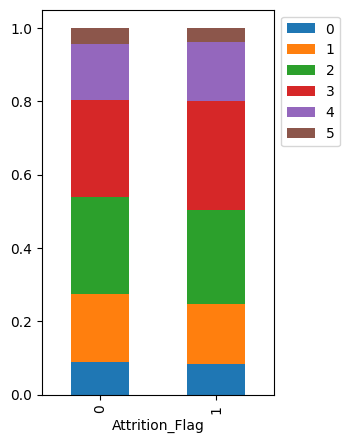

In [ ]:
stacked_barplot(bank_data, "Attrition_Flag", "Dependent_count")

`Total_Revolving_Bal` vs `Attrition_Flag`

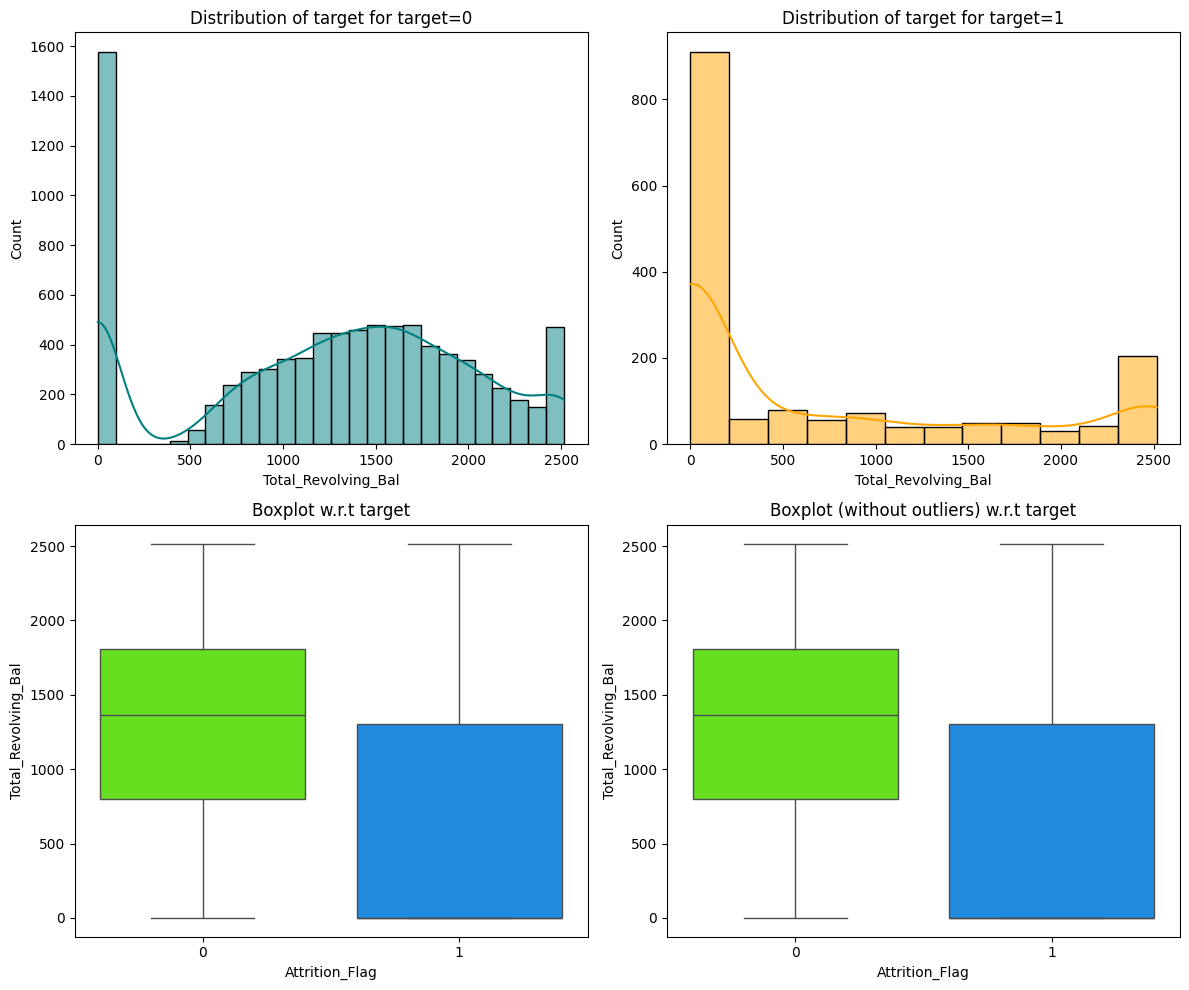

In [ ]:
distribution_plot_wrt_target(bank_data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Credit_Limit`

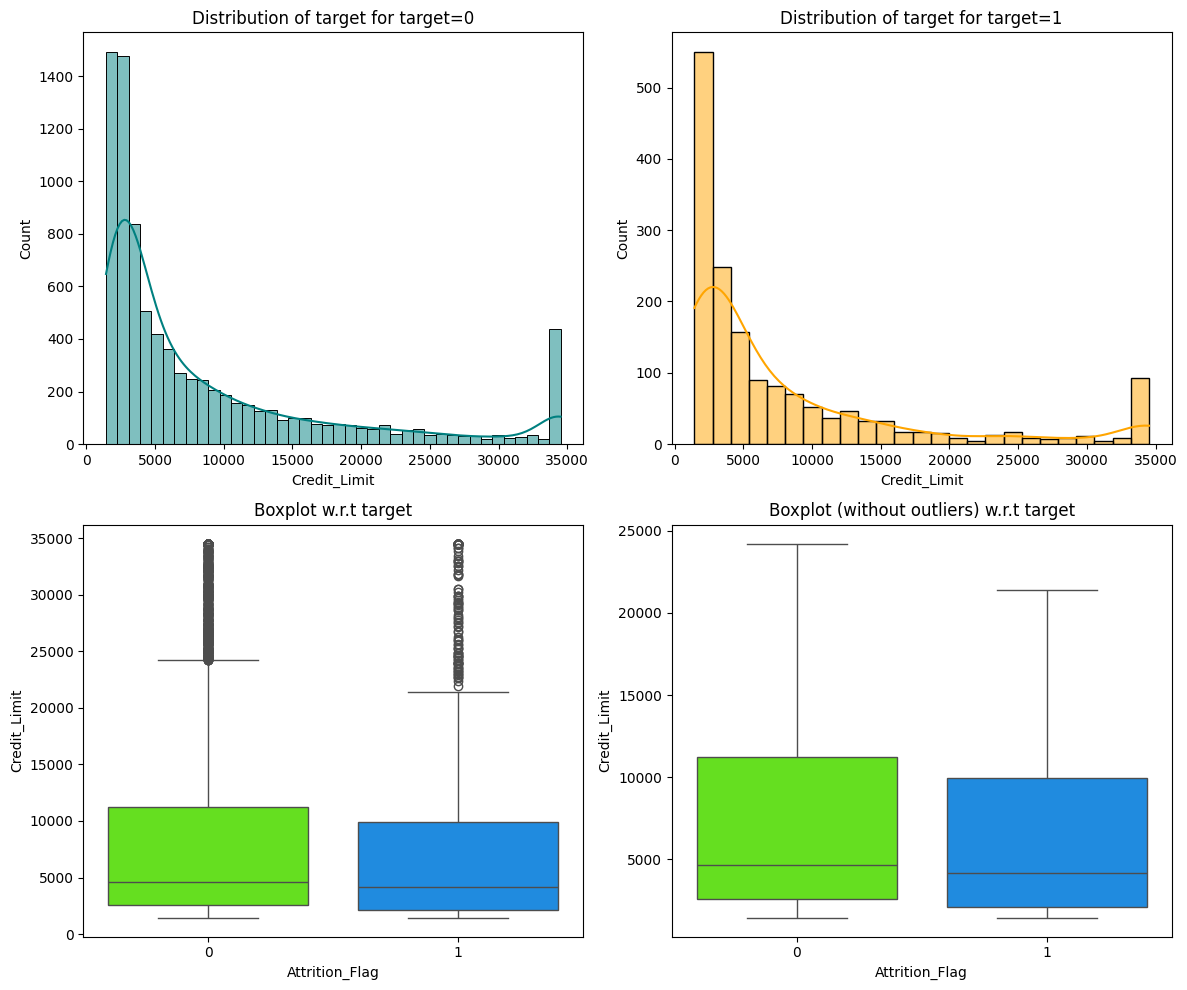

In [ ]:
distribution_plot_wrt_target(bank_data, "Credit_Limit", "Attrition_Flag" )

`Attrition_Flag vs Customer_Age`

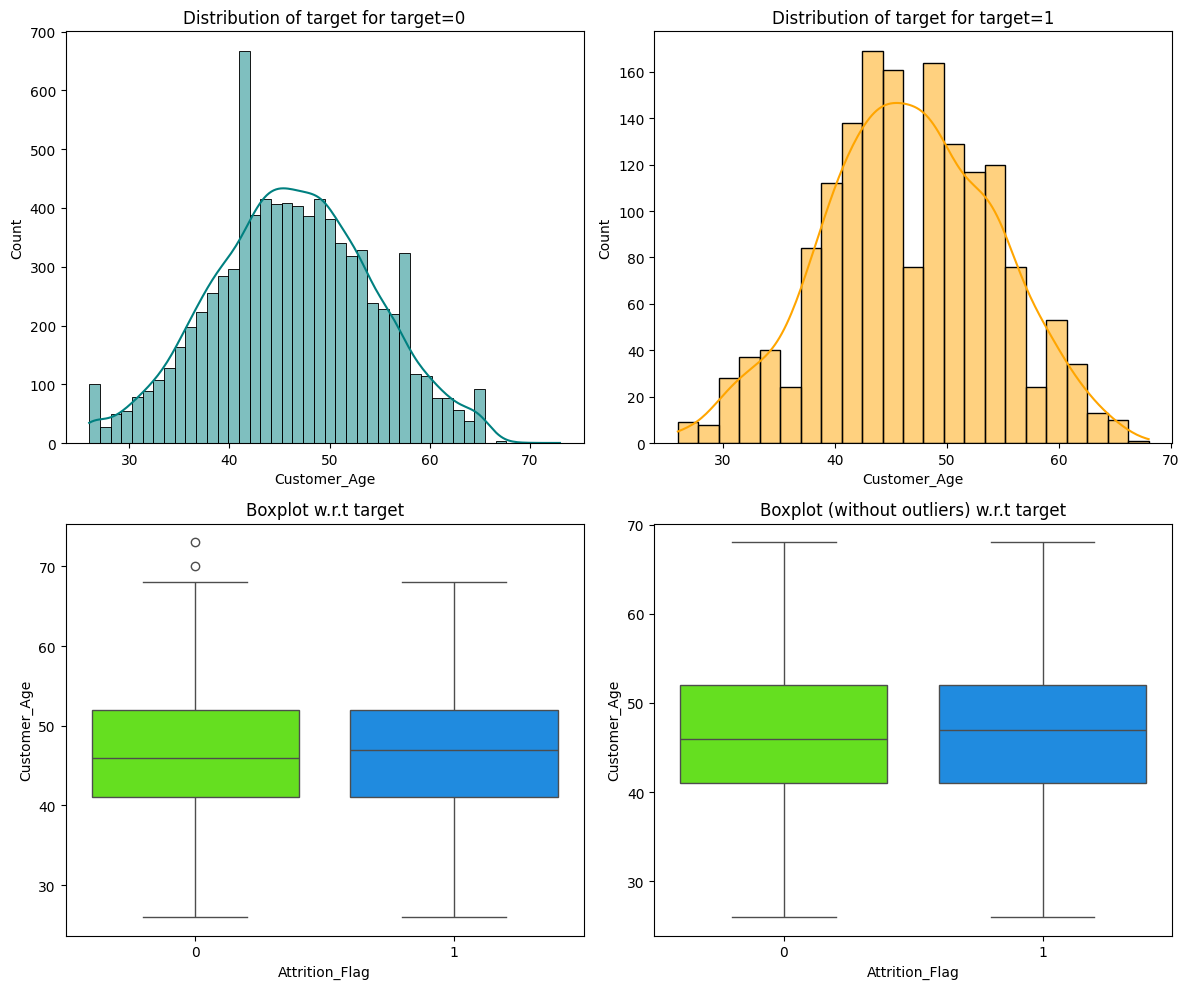

In [ ]:
distribution_plot_wrt_target(bank_data,  "Customer_Age", "Attrition_Flag")

`Total_Trans_Amt` vs `Attrition_Flag`

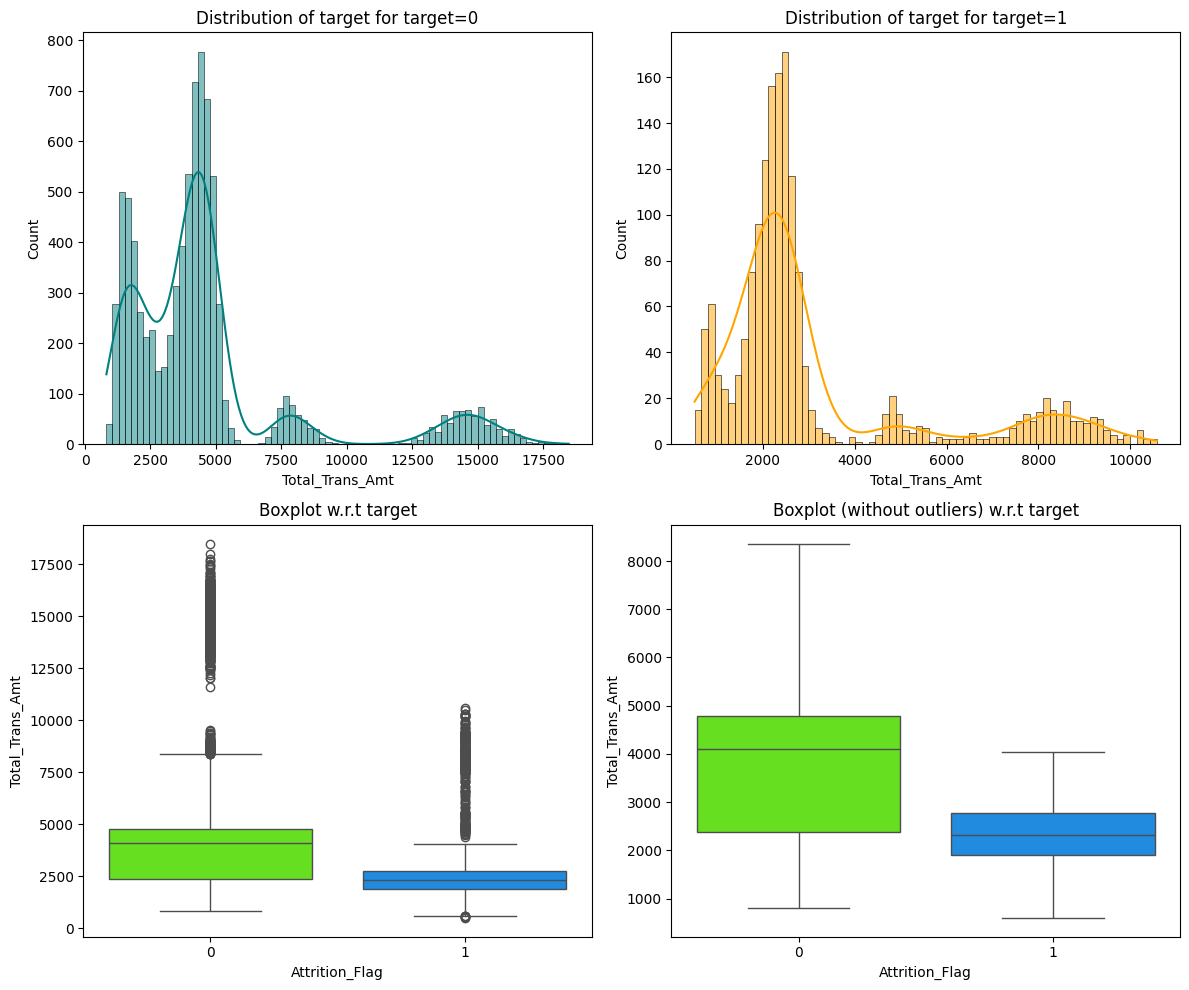

In [ ]:
distribution_plot_wrt_target(bank_data, "Total_Trans_Amt", "Attrition_Flag")

`Avg_Utilization_Ratio` vs `Attrition_Flag`

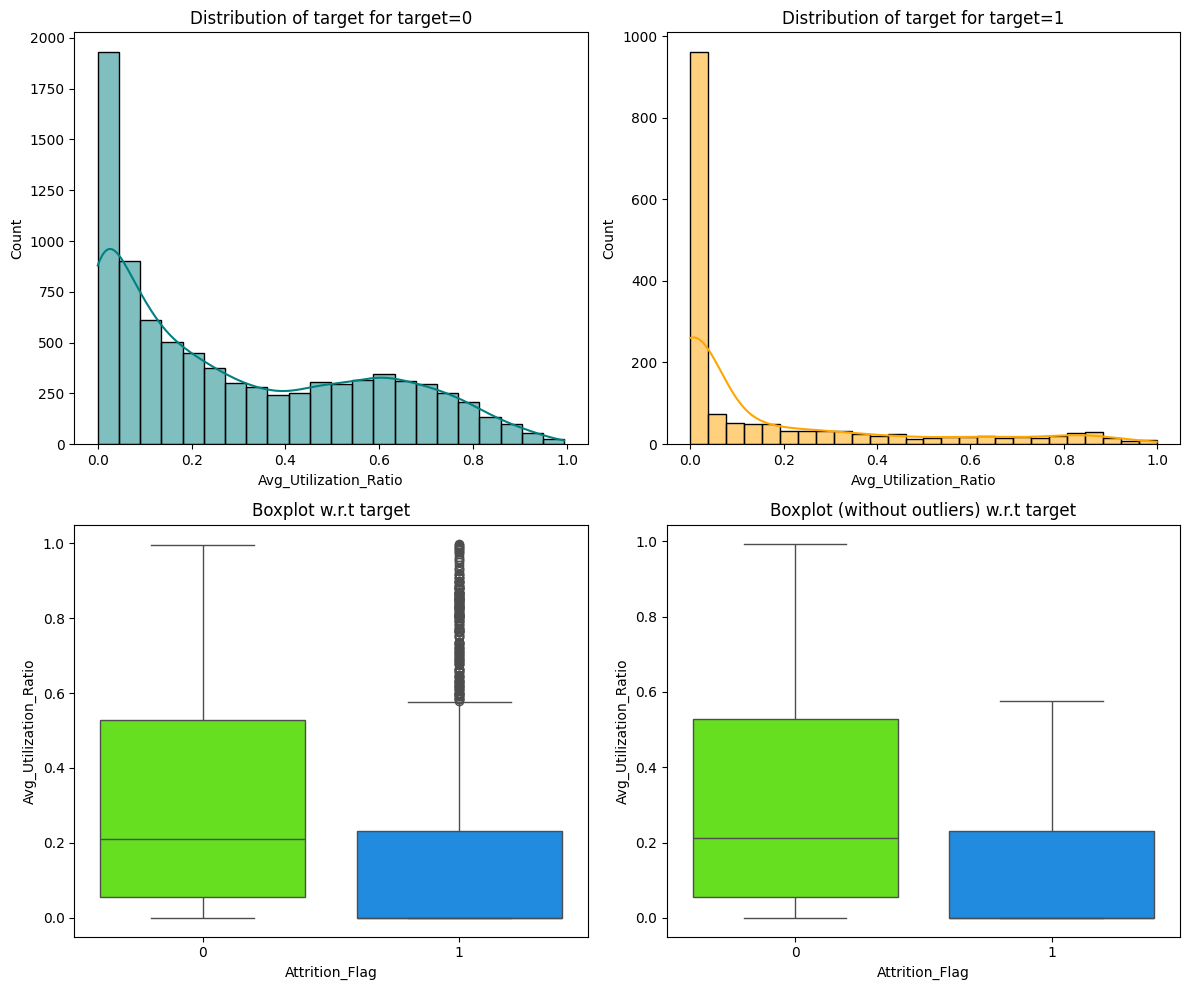

In [ ]:
distribution_plot_wrt_target(bank_data, "Avg_Utilization_Ratio", "Attrition_Flag")

`Attrition_Flag vs Months_on_book`

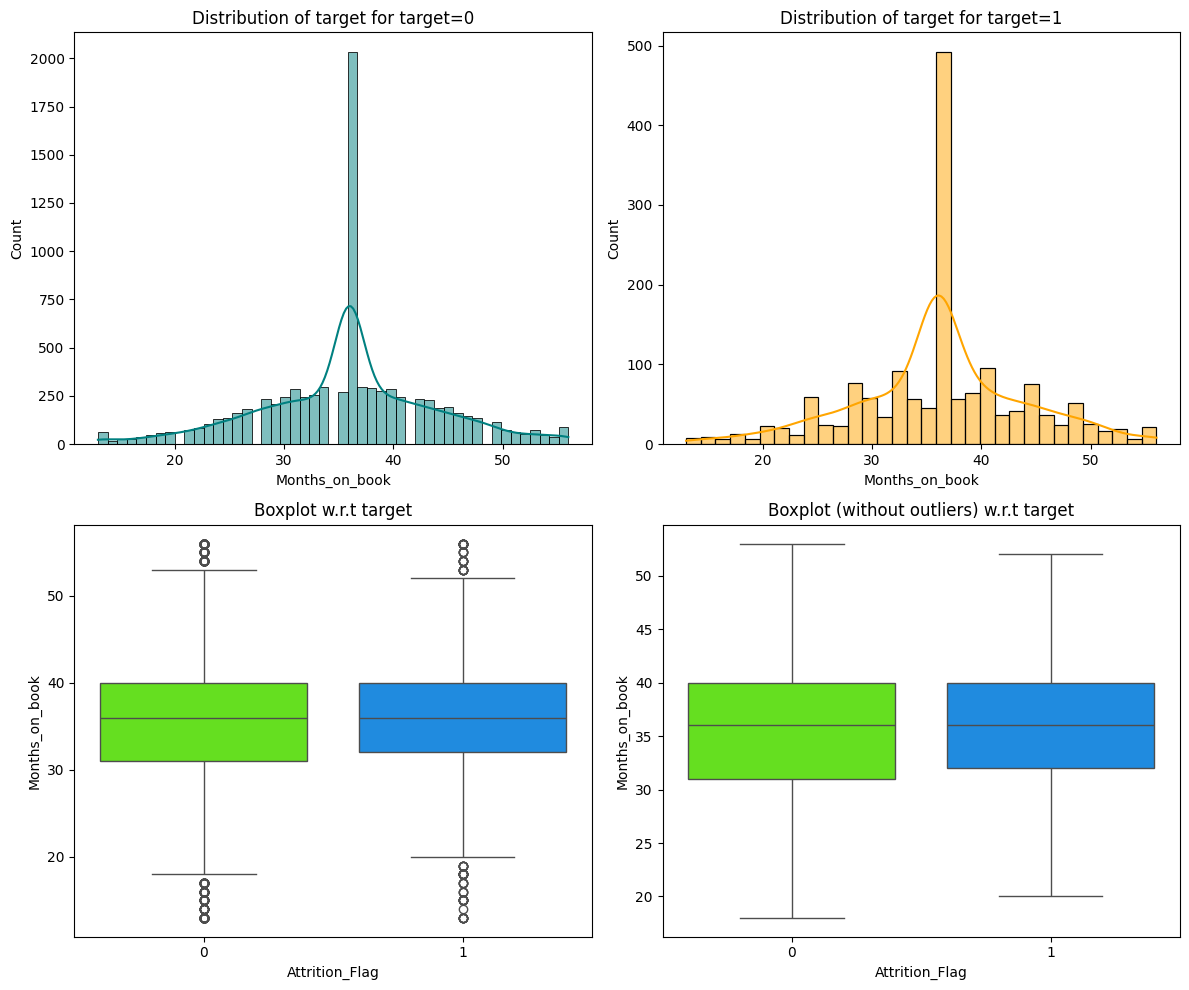

In [ ]:
distribution_plot_wrt_target(bank_data, "Months_on_book", "Attrition_Flag")

`Attrition_Flag vs Total_Revolving_Bal`

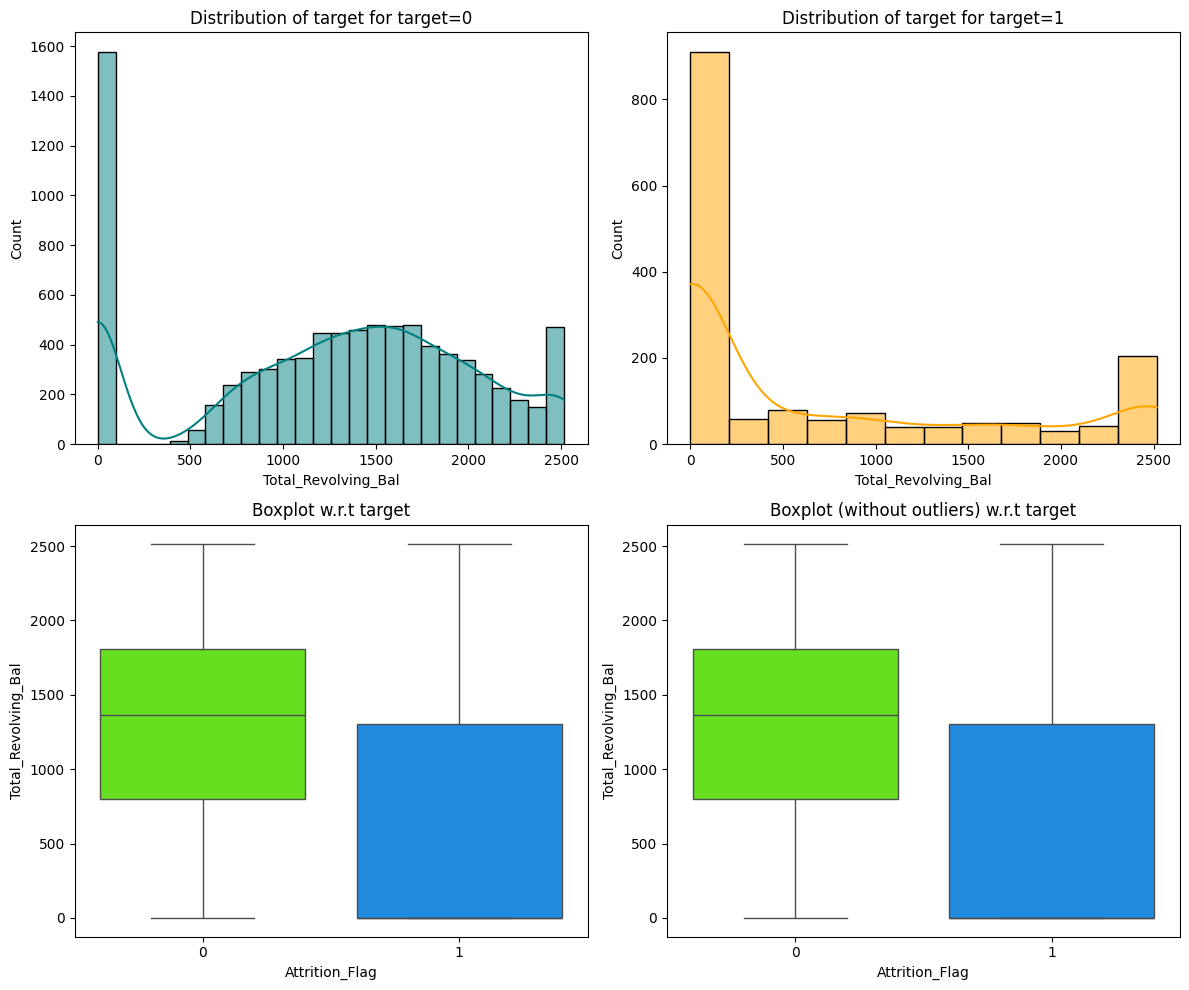

In [ ]:
distribution_plot_wrt_target(bank_data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Avg_Open_To_Buy`

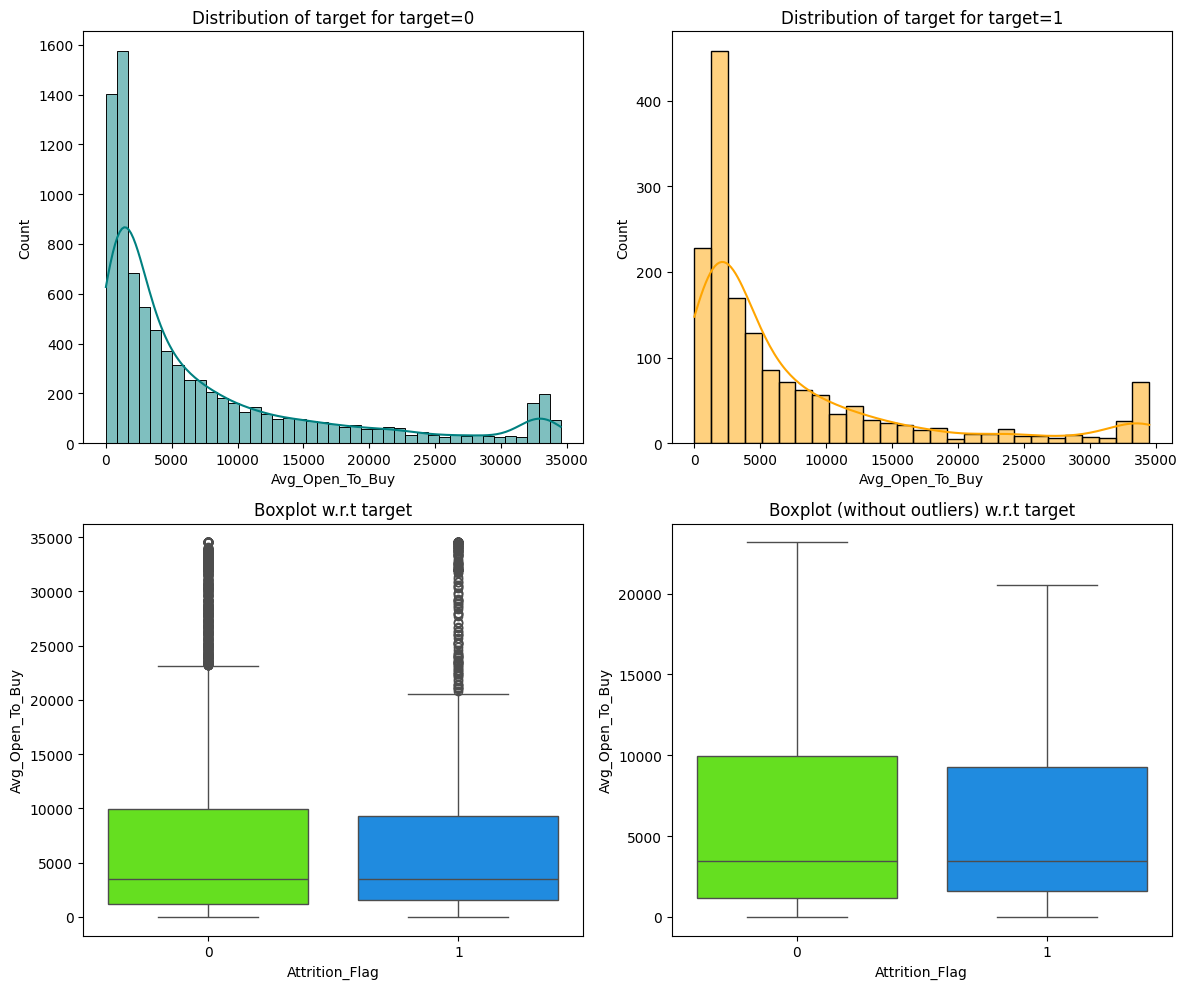

In [ ]:
distribution_plot_wrt_target(bank_data, "Avg_Open_To_Buy", "Attrition_Flag" )

## Data Pre-processing

#### Outlier Detection

In [ ]:
bank_data_numeric = bank_data.select_dtypes(include=['int64', 'float64'])
Q1 = bank_data_numeric.quantile(0.25)  # To find the 25th percentile
Q3 = bank_data_numeric.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)
print(lower)
print(upper)

Attrition_Flag                  0.000
Customer_Age                   24.500
Dependent_count                -2.000
Months_on_book                 17.500
Total_Relationship_Count        0.000
Months_Inactive_12_mon          0.500
Contacts_Count_12_mon           0.500
Credit_Limit               -10213.750
Total_Revolving_Bal         -1778.500
Avg_Open_To_Buy            -11477.250
Total_Amt_Chng_Q4_Q1            0.289
Total_Trans_Amt             -1722.750
Total_Trans_Ct                 -9.000
Total_Ct_Chng_Q4_Q1             0.228
Avg_Utilization_Ratio          -0.697
dtype: float64
Attrition_Flag                 0.000
Customer_Age                  68.500
Dependent_count                6.000
Months_on_book                53.500
Total_Relationship_Count       8.000
Months_Inactive_12_mon         4.500
Contacts_Count_12_mon          4.500
Credit_Limit               23836.250
Total_Revolving_Bal         3921.500
Avg_Open_To_Buy            22660.750
Total_Amt_Chng_Q4_Q1           1.201
Total_Tr

In [ ]:
# checking the % outliers
((bank_data.select_dtypes(include=["float64", "int64"]) < lower) | (bank_data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(bank_data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

#### Train Test Split

In [ ]:
# Creating the copy of the data
bank_data1 = bank_data.copy()

In [ ]:
# Replace income category empty values with np.nan
bank_data1["Income_Category"].replace("", np.nan, inplace=True)

In [ ]:
bank_data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Split the train and test data
x = bank_data1.drop("Attrition_Flag", axis=1)
y = bank_data1["Attrition_Flag"]

In [ ]:
# splitting the data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (507, 19) (1519, 19)


## Missing value imputation




In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

## Model Building

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])
# Transform the validation data
X_val[reqd_col_for_impute]  = imputer.fit_transform(X_val[reqd_col_for_impute])
# Transform the test data
X_test[reqd_col_for_impute] = imputer.fit_transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4279
M    3822
Name: count, dtype: int64
******************************
Education_Level
Graduate         3733
High School      1619
Uneducated       1171
College           816
Post-Graduate     407
Doctorate         355
Name: count, dtype: int64
******************************
Marital_Status
Married     4346
Single      3144
Divorced     611
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2812
$40K - $60K       1453
$80K - $120K      1237
$60K - $80K       1122
abc                889
$120K +            588
Name: count, dtype: int64
******************************
Card_Category
Blue        7557
Silver       436
Gold          93
Platinum      15
Name: count, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    266
M    241
Name: count, dtype: int64
******************************
Education_Level
Graduate         237
High School       94
Uneducated        84
College           49
Doctorate         24
Post-Graduate     19
Name: count, dtype: int64
******************************
Marital_Status
Married     272
Single      193
Divorced     42
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    174
$40K - $60K        88
$60K - $80K        74
$80K - $120K       71
abc                62
$120K +            38
Name: count, dtype: int64
******************************
Card_Category
Blue        465
Silver       37
Gold          3
Platinum      2
Name: count, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4279
M    3822
Name: count, dtype: int64
******************************
Education_Level
Graduate         3733
High School      1619
Uneducated       1171
College           816
Post-Graduate     407
Doctorate         355
Name: count, dtype: int64
******************************
Marital_Status
Married     4346
Single      3144
Divorced     611
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2812
$40K - $60K       1453
$80K - $120K      1237
$60K - $80K       1122
abc                889
$120K +            588
Name: count, dtype: int64
******************************
Card_Category
Blue        7557
Silver       436
Gold          93
Platinum      15
Name: count, dtype: int64
******************************


### Encoding categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)  
X_test = pd.get_dummies(X_test, drop_first=True)  
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 30) (507, 30) (1519, 30)


In [ ]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9066,54,1,36,1,3,3,3723.000,1728,1995.000,0.595,8554,99,0.678,0.464,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
5814,58,4,48,1,4,3,5396.000,1803,3593.000,0.493,2107,39,0.393,0.334,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False
792,45,4,36,6,1,3,15987.000,1648,14339.000,0.732,1436,36,1.250,0.103,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False
1791,34,2,36,4,3,4,3625.000,2517,1108.000,1.158,2616,46,1.300,0.694,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False
5011,49,2,39,5,3,4,2720.000,1926,794.000,0.602,3806,61,0.794,0.708,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False


### Model evaluation criterion

-


**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
# Confusion matrix from Skilearn
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9784615384615385
Random forest: 1.0
AdaBoost: 0.8707692307692307
Gradient Boosting: 0.8938461538461538
XGBoost: 1.0

Validation Performance:

Bagging: 0.8513513513513513
Random forest: 0.7432432432432432
AdaBoost: 0.8513513513513513
Gradient Boosting: 0.8513513513513513
XGBoost: 0.9324324324324325


### Model Building with Oversampled data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_oversp, y_train_oversp = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_oversp == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_oversp == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_oversp.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_oversp.shape))

Before Oversampling, counts of label 'Yes': 1300
Before Oversampling, counts of label 'No': 6801 

After Oversampling, counts of label 'Yes': 6801
After Oversampling, counts of label 'No': 6801 

After Oversampling, the shape of train_X: (13602, 30)
After Oversampling, the shape of train_y: (13602,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance Oversampling:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance Oversampling:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance Oversampling:

Bagging: 0.9784615384615385
Random forest: 1.0
AdaBoost: 0.8707692307692307
Gradient Boosting: 0.8938461538461538
XGBoost: 1.0

Validation Performance Oversampling:

Bagging: 0.8513513513513513
Random forest: 0.7432432432432432
AdaBoost: 0.8513513513513513
Gradient Boosting: 0.8513513513513513
XGBoost: 0.9324324324324325


### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1300
Before Under Sampling, counts of label 'No': 6801 

After Under Sampling, counts of label 'Yes': 1300
After Under Sampling, counts of label 'No': 1300 

After Under Sampling, the shape of train_X: (2600, 30)
After Under Sampling, the shape of train_y: (2600,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\n" "Training Performance UnderSampling:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance UnderSampling:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance UnderSampling:

Bagging: 0.9784615384615385
Random forest: 1.0
AdaBoost: 0.8707692307692307
Gradient Boosting: 0.8938461538461538
XGBoost: 1.0

Validation Performance UnderSampling:

Bagging: 0.8513513513513513
Random forest: 0.7432432432432432
AdaBoost: 0.8513513513513513
Gradient Boosting: 0.8513513513513513
XGBoost: 0.9324324324324325


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
from traitlets import default


Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=default, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=nan:


In [ ]:
# Creating new pipeline with best parameters
tuned_dt = DecisionTreeClassifier( min_samples_leaf=1, min_impurity_decrease= 0.001, max_leaf_nodes= 15, max_depth= 4
) 

tuned_dt.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001)

In [ ]:
dt_train = model_performance_classification_sklearn(tuned_dt, X_train,y_train) 
dt_train

,Accuracy,Recall,Precision,F1
0,0.928,0.642,0.874,0.740


In [ ]:
dt_val = model_performance_classification_sklearn(tuned_dt, X_val,y_val)  
dt_val

,Accuracy,Recall,Precision,F1
0,0.937,0.662,0.875,0.754


In [ ]:
dt_test = model_performance_classification_sklearn(tuned_dt, X_test,y_test)  
dt_test

#### Tuning AdaBoost with original data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8692307692307691:
CPU times: total: 3.02 s
Wall time: 31 s


In [ ]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) 

tuned_adb.fit(X_train,y_train) 

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
adb_train = model_performance_classification_sklearn(tuned_adb, X_train,y_train) 
adb_train

,Accuracy,Recall,Precision,F1
0,0.985,0.934,0.969,0.951


In [ ]:
# Checking model's performance on validation set
adb_val =  model_performance_classification_sklearn(tuned_adb, X_val,y_val) 
adb_val

,Accuracy,Recall,Precision,F1
0,0.966,0.892,0.880,0.886


In [ ]:
# Checking model's performance on test set
adb_test =  model_performance_classification_sklearn(tuned_adb, X_test,y_test) 
adb_test

,Accuracy,Recall,Precision,F1
0,0.967,0.846,0.951,0.895


#### Tuning Gradient Boosting with original data

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8384615384615385:
CPU times: total: 3.08 s
Wall time: 39.1 s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
    )
tuned_gbm1.fit(X_train,y_train) 

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
gdb_train = model_performance_classification_sklearn(tuned_gbm1, X_train,y_train) 
gdb_train

,Accuracy,Recall,Precision,F1
0,0.976,0.889,0.959,0.923


In [ ]:
# Checking model's performance on validation set
gdb_val =  model_performance_classification_sklearn(tuned_gbm1, X_val,y_val) 
gdb_val

,Accuracy,Recall,Precision,F1
0,0.963,0.824,0.910,0.865


In [ ]:
# Checking model's performance on test set
gdb_test =  model_performance_classification_sklearn(tuned_gbm1, X_test,y_test) 
gdb_test

,Accuracy,Recall,Precision,F1
0,0.963,0.830,0.942,0.882


#### Tuning XGBoost with original data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in XGBoost
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9353846153846155:
CPU times: total: 3.55 s
Wall time: 18.7 s


#### Observation on XGBoost with original data
Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9353846153846155:
CPU times: total: 3.55 s
Wall time: 18.7 s

In [ ]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=75,
    learning_rate=0.05,
    gamma=1,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train,y_train) 
xgb_train

,Accuracy,Recall,Precision,F1
0,0.977,0.992,0.882,0.933


In [ ]:
# Checking model's performance on validation set
xgb_val =  model_performance_classification_sklearn(tuned_xgb, X_val,y_val) 
xgb_val

,Accuracy,Recall,Precision,F1
0,0.951,0.946,0.769,0.848


In [ ]:
# Checking model's performance on test set
xgb_test =  model_performance_classification_sklearn(tuned_xgb, X_test,y_test) 
xgb_test

,Accuracy,Recall,Precision,F1
0,0.632,0.996,0.311,0.474


#### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=default, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=nan:


In [ ]:
# Creating new pipeline with best parameters
tuned_dt_over = DecisionTreeClassifier( min_samples_leaf=1, min_impurity_decrease= 0.001, max_leaf_nodes= 15, max_depth= 4
) 

tuned_dt_over.fit(X_train_over,y_train_over) 

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001)

In [ ]:
dt_train_over = model_performance_classification_sklearn(tuned_dt_over, X_train_over,y_train_over) 
dt_train_over

,Accuracy,Recall,Precision,F1
0,0.909,0.908,0.910,0.909


In [ ]:
# Checking model's performance on validation set
dt_val_over =  model_performance_classification_sklearn(tuned_dt_over, X_val,y_val) 
dt_val_over

,Accuracy,Recall,Precision,F1
0,0.897,0.919,0.596,0.723


In [ ]:
# Checking model's performance on test set
dt_test_over =  model_performance_classification_sklearn(tuned_dt_over, X_test,y_test) 
dt_test_over

,Accuracy,Recall,Precision,F1
0,0.903,0.874,0.656,0.749


### Tuning Adaboost with oversampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations 
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_oversp,y_train_oversp) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9588253662964086:
CPU times: total: 4.33 s
Wall time: 52.5 s


#### Tunining Adaboost with Oversampled data observation
Best parameters are {'n_estimators': 75, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9588253662964086:
CPU times: total: 4.16 s
Wall time: 39.1 s

In [ ]:
# Creating new pipeline with best parameters
tuned_adb_os = AdaBoostClassifier(
    n_estimators= 75, learning_rate= 0.05, estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
    )
tuned_adb_os.fit(X_train_oversp,y_train_oversp) 

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=75)

In [ ]:
adb_os_train = model_performance_classification_sklearn(tuned_adb_os, X_train_oversp,y_train_oversp) 
adb_os_train

,Accuracy,Recall,Precision,F1
0,0.971,0.976,0.966,0.971


In [ ]:
adb_os_val = model_performance_classification_sklearn(tuned_adb_os, X_val,y_val) 
adb_os_val

,Accuracy,Recall,Precision,F1
0,0.955,0.946,0.787,0.859


In [ ]:
adb_os_test = model_performance_classification_sklearn(tuned_adb_os, X_test,y_test) 
adb_os_test

,Accuracy,Recall,Precision,F1
0,0.968,0.901,0.905,0.903


#### Tuning Gradient Boosting with oversampled data

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_oversp,y_train_oversp) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9586774430565761:
CPU times: total: 5.31 s
Wall time: 1min 3s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1_os = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
    )
tuned_gbm1_os.fit( X_train_oversp,y_train_oversp) 

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
gdb_os_train = model_performance_classification_sklearn(tuned_gbm1_os, X_train_oversp,y_train_oversp) 
gdb_os_train

,Accuracy,Recall,Precision,F1
0,0.976,0.979,0.974,0.976


In [ ]:
gdb_os_val = model_performance_classification_sklearn(tuned_gbm1_os, X_val,y_val) 
gdb_os_val

,Accuracy,Recall,Precision,F1
0,0.947,0.892,0.776,0.830


In [ ]:
gdb_os_test = model_performance_classification_sklearn(tuned_gbm1_os, X_val,y_val) 
gdb_os_test

,Accuracy,Recall,Precision,F1
0,0.931,0.932,0.697,0.798


#### Tuning XGBoost with oversampled data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_oversp,y_train_oversp) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9986764705882353:
CPU times: total: 4.48 s
Wall time: 17 s


In [ ]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=50,
    learning_rate=0.01,
    gamma=3,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train_oversp, y_train_oversp)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_os_train = model_performance_classification_sklearn(tuned_xgb, X_train_oversp,y_train_oversp) 
xgb_os_train

,Accuracy,Recall,Precision,F1
0,0.950,0.956,0.945,0.951


In [ ]:
xgb_os_val = model_performance_classification_sklearn(tuned_xgb, X_val,y_val) 
xgb_os_val

,Accuracy,Recall,Precision,F1
0,0.931,0.932,0.697,0.798


In [ ]:
xgb_os_test = model_performance_classification_sklearn(tuned_xgb, X_test,y_test) 
xgb_os_test

,Accuracy,Recall,Precision,F1
0,0.632,0.996,0.311,0.474


#### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 4, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.8861538461538462:


In [ ]:
# Creating new pipeline with best parameters
tuned_dt_under = DecisionTreeClassifier( min_samples_leaf=1, min_impurity_decrease= 0.001, max_leaf_nodes= 15, max_depth= 4
) 

tuned_dt_under.fit(X_train_un,y_train_un) 

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001)

In [ ]:
dt_un_train = model_performance_classification_sklearn(tuned_dt_under, X_train_un,y_train_un) 
dt_un_train

,Accuracy,Recall,Precision,F1
0,0.902,0.893,0.910,0.901


In [ ]:
dt_un_val = model_performance_classification_sklearn(tuned_dt_under, X_val,y_val) 
dt_un_val

,Accuracy,Recall,Precision,F1
0,0.903,0.946,0.609,0.741


In [ ]:
dt_un_test = model_performance_classification_sklearn(tuned_dt_under, X_test,y_test) 
dt_un_test

,Accuracy,Recall,Precision,F1
0,0.898,0.889,0.639,0.744


#### Tuning Gradient Boosting with undersampled data

In [ ]:

# defining model
Model = GradientBoostingClassifier(random_state=1)


# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=default, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=nan:


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1_un = GradientBoostingClassifier(
    max_features=0.7,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.05,
    n_estimators=100,
    subsample=0.7,
    )
tuned_gbm1_un.fit( X_train_un,y_train_un) 

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [ ]:
gdb_un_train = model_performance_classification_sklearn(tuned_gbm1_un, X_train_un,y_train_un) 
gdb_un_train

,Accuracy,Recall,Precision,F1
0,0.960,0.966,0.954,0.960


In [ ]:
gdb_un_Val = model_performance_classification_sklearn(tuned_gbm1_un, X_val,y_val) 
gdb_un_Val

,Accuracy,Recall,Precision,F1
0,0.931,0.932,0.697,0.798


In [ ]:
gdb_un_test = model_performance_classification_sklearn(tuned_gbm1_un, X_test,y_test) 
gdb_un_test

,Accuracy,Recall,Precision,F1
0,0.931,0.941,0.726,0.819


#### Tuning Adaboost with undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations 
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9638461538461538:
CPU times: total: 1.23 s
Wall time: 17.2 s


In [ ]:
# Creating new pipeline with best parameters
tuned_adb_un = AdaBoostClassifier(
    n_estimators= 100, learning_rate= 0.1, estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
    )
tuned_adb_un.fit(X_train_un,y_train_un) 

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100)

In [ ]:
adb_un_train = model_performance_classification_sklearn(tuned_adb_un, X_train_un,y_train_un) 
adb_un_train

,Accuracy,Recall,Precision,F1
0,0.992,0.993,0.991,0.992


In [ ]:
adb_un_train = model_performance_classification_sklearn(tuned_adb_un, X_train_un,y_train_un) 
adb_un_train

,Accuracy,Recall,Precision,F1
0,0.992,0.993,0.991,0.992


#### Tuning XGBoost with undersampled data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in XGBoost
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) 

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9984615384615385:
CPU times: total: 2 s
Wall time: 7.98 s


In [ ]:
tuned_xgb_un = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=3,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_un_train = model_performance_classification_sklearn(tuned_xgb_un, X_train_un,y_train_un) 
xgb_un_train

,Accuracy,Recall,Precision,F1
0,0.980,1.000,0.961,0.980


In [ ]:
xgb_un_val = model_performance_classification_sklearn(tuned_xgb_un, X_val,y_val) 
xgb_un_val

,Accuracy,Recall,Precision,F1
0,0.917,0.973,0.643,0.774


## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
    dt_train.T,
    dt_train_over.T,
    dt_un_train.T,
    gdb_train.T,
    gdb_os_train.T,
    gdb_un_train.T,
    adb_train.T,
    adb_os_train.T,
    adb_un_train.T,
    xgb_train.T,
    xgb_os_train.T,
    xgb_un_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree with Original Data",
    "Decision Tree with Oversampled Data",
    "Decision Tree with Undersampled Data",
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "AdaBoost trained with Original data",
    "AdaBoost trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
    "XgBoot trained with Original data",
    "XGBoost trained with Oversampled data",
    "XGBoost trained with Undersampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree with Original Data,Decision Tree with Oversampled Data,Decision Tree with Undersampled Data,Gradient boosting trained with Original data,Gradient boosting trained with Oversampled data,Gradient boosting trained with Undersampled data,AdaBoost trained with Original data,AdaBoost trained with Oversampled data,AdaBoost trained with Undersampled data,XgBoot trained with Original data,XGBoost trained with Oversampled data,XGBoost trained with Undersampled data
Accuracy,0.909,0.909,0.902,0.976,0.976,0.992,0.985,0.971,0.992,0.977,0.950,0.980
Recall,0.908,0.908,0.893,0.889,0.979,0.993,0.934,0.976,0.993,0.992,0.956,1.000
Precision,0.910,0.910,0.910,0.959,0.974,0.991,0.969,0.966,0.991,0.882,0.945,0.961
F1,0.909,0.909,0.901,0.923,0.976,0.992,0.951,0.971,0.992,0.933,0.951,0.980


### Test set final performance

In [ ]:

models_test_comp_df = pd.concat(
    [
    dt_test.T,
    dt_test_over.T,
    dt_un_test.T,
    gdb_test.T,
    gdb_os_test.T,
    adb_test.T,
    adb_os_test.T,
    xgb_os_test.T,
    gdb_un_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree with Original Data",
    "Decision Tree with Oversampled Data",
    "Decision Tree with Undersampled Data",
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with original data",
    "AdaBoost trained with oversampled data",
    "XGBoost trained with Oversampled data",
    "XGBoost trained with Undersampled data"
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree with Original Data,Decision Tree with Oversampled Data,Decision Tree with Undersampled Data,Gradient boosting trained with Original data,Gradient boosting trained with Oversampled data,AdaBoost trained with original data,AdaBoost trained with oversampled data,XGBoost trained with Oversampled data,XGBoost trained with Undersampled data
Accuracy,0.903,0.903,0.898,0.963,0.931,0.967,0.968,0.632,0.931
Recall,0.874,0.874,0.889,0.830,0.932,0.846,0.901,0.996,0.941
Precision,0.656,0.656,0.639,0.942,0.697,0.951,0.905,0.311,0.726
F1,0.749,0.749,0.744,0.882,0.798,0.895,0.903,0.474,0.819


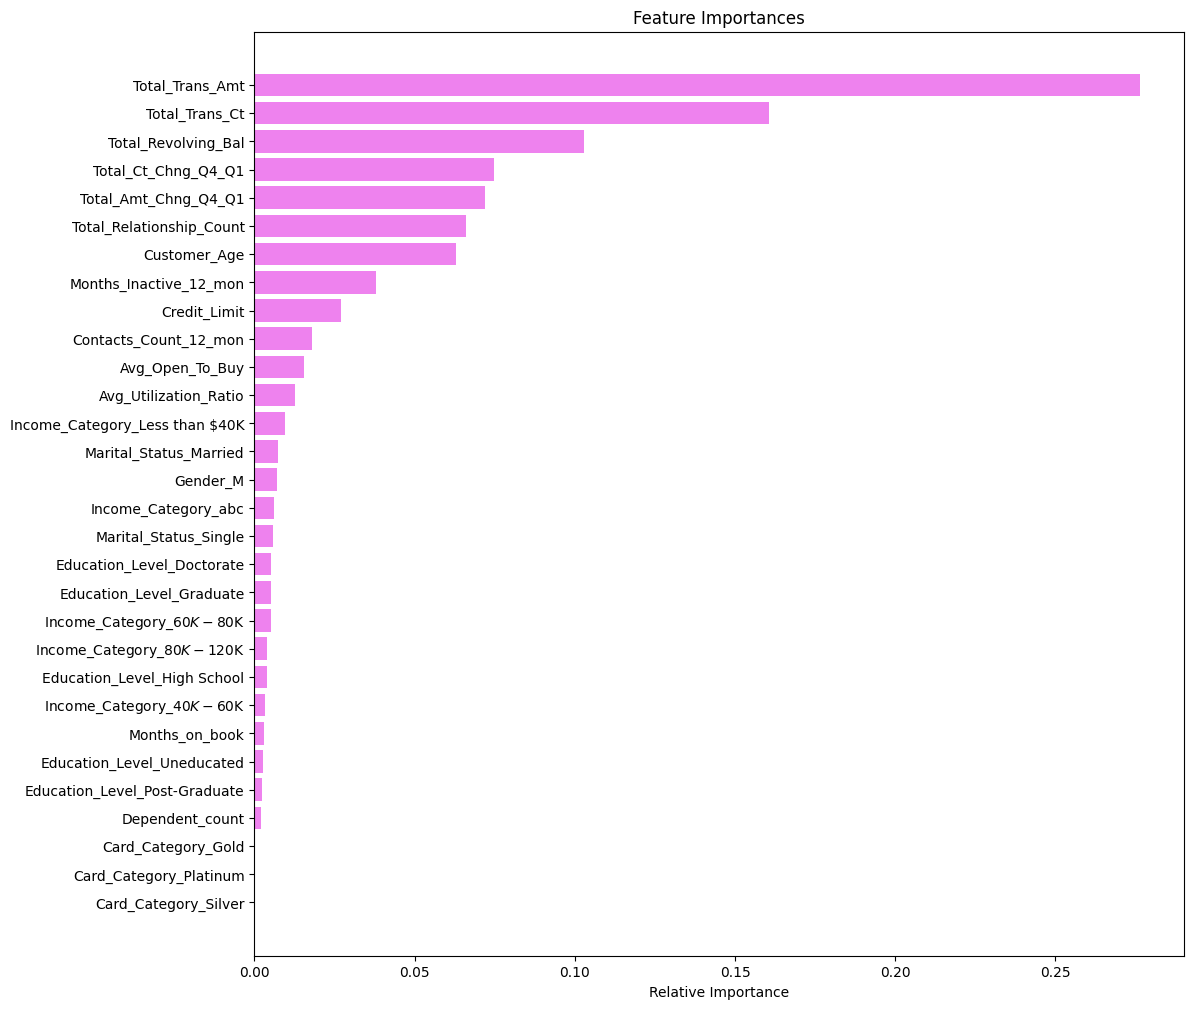

In [ ]:
feature_names = X_train.columns
importances =  tuned_adb_os.feature_importances_ 
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

### Observations ####
* The best model is Adaboost with Oversampled Model for Bank Churn prediction.
* The total Transaction amount, Total Transaction count, Total Revolving balance are the key criteria that a customer will be staying with the bank. 
* The above three parameters highlights the customer assocation with the bank and likely to stay with the bank.

### Recommendations ####

* Based on the above recommendations, the bank can likely to target customers who are not active in bank for a long period of time.
* Incentivize the customers to perform transactions so they can stay with the bank.
* Target customers with age range from 28-56 years are working class, more likely utilize bank services.

***